# Base de Datos 3 Modelo 4

## CARGA DE DATOS

In [1]:
import weka.core.jvm as jvm
from weka.core.converters import Loader
from weka.core.converters import load_any_file
from weka.core.converters import save_any_file
import weka.core.converters as converters
from weka.filters import Filter
import pandas as pd
from weka.core.dataset import Instances

import warnings
warnings.filterwarnings("ignore")

jvm.start(system_cp=True, packages=True)

In [3]:
data_dir = "/home/pablo/Escritorio/TFG/Bases de Datos, Modelos y Esquemas/"

loader = Loader(classname="weka.core.converters.ArffLoader")
data_modelo_4 = loader.load_file(data_dir + "Base de datos modelo 4.arff")
data_modelo_4.class_is_last()

In [5]:
def arff2csv(arff_path, csv_path=None):
    with open(arff_path, 'r') as fr:
        attributes = []
        if csv_path is None:
            csv_path = arff_path[:-4] + 'csv'  # *.arff -> *.csv
        write_sw = False
        with open(csv_path, 'w') as fw:
            for line in fr.readlines():
                if write_sw:
                    fw.write(line)
                elif '@data' in line:
                    fw.write(','.join(attributes) + '\n')
                    write_sw = True
                elif '@attribute' in line:
                    attributes.append(line.split(' ')[1])  # @attribute attribute_tag numeric

        print("Convert {} to {}.".format(arff_path, csv_path))

In [6]:
input_file = "/home/pablo/Escritorio/TFG/Bases de Datos, Modelos y Esquemas/Base de datos modelo 4.arff"
output_file = None
arff2csv(input_file,output_file)

Convert /home/pablo/Escritorio/TFG/Bases de Datos, Modelos y Esquemas/Base de datos modelo 4.arff to /home/pablo/Escritorio/TFG/Bases de Datos, Modelos y Esquemas/Base de datos modelo 4.csv.


In [7]:
filepath = "/home/pablo/Escritorio/TFG/Bases de Datos, Modelos y Esquemas/Base de datos modelo 4.csv"
index = None
target = "Soft-Tissue_injury_≥4days"

data_modelo_4_csv = pd.read_csv(filepath, index_col=index)
data_modelo_4_csv[target] = data_modelo_4_csv[target].astype("category")

data_modelo_4_csv

DVJ_Valgus_KneeMedialDisplacement_D_discr        BMI AgeGroup  \
0                                            0  18.716444   U17U19   
1                                            0  22.182267   U17U19   
2                                            1  25.352783   U17U19   
3                                            0  21.332873   U17U19   
4                                            0  23.085619   U17U19   
..                                         ...        ...      ...   
255                                          0  26.841821   U17U19   
256                                          1  22.079395   U17U19   
257                                          0  22.944419   U17U19   
258                                          1  22.566588   U17U19   
259                                          0  22.134414   U17U19   

     ROM-PADF-KE_D  DVJ_Valgus_FPPA_D_discr  TrainFrequency  \
0               33                        0               4   
1               41                        0               4   
2               35                        0               4   
3               33                        0               4   
4               25                        0               4   
..             ...                      ...             ...   
255             34                        0               4   
256             33                        0               4   
257             28                        0               4   
258             32                        0               4   
259             34                        0               4   

     DVJ_Valgus_FPPA_ND_discr Asym_SLCMJLanding-pVGRF(10percent)_discr  \
0                           0                   No_Bilateral_Asymmetry   
1                           0                   No_Bilateral_Asymmetry   
2                           0                   No_Bilateral_Asymmetry   
3                           0                   No_Bilateral_Asymmetry   
4                           1                   No_Bilateral_Asymmetry   
..                        ...                                      ...   
255                         2                   No_Bilateral_Asymmetry   
256                         0                   No_Bilateral_Asymmetry   
257                         0                      Bilateral_Asymmetry   
258                         0                      Bilateral_Asymmetry   
259                         1                   No_Bilateral_Asymmetry   

    Asym-ROM-PHIR(≥8)_discr Asym_TJ_Valgus_FPPA(10percent)_discr  ...  \
0    No_Bilateral_Asymmetry               No_Bilateral_Asymmetry  ...   
1    No_Bilateral_Asymmetry               No_Bilateral_Asymmetry  ...   
2    No_Bilateral_Asymmetry               No_Bilateral_Asymmetry  ...   
3    No_Bilateral_Asymmetry               No_Bilateral_Asymmetry  ...   
4    No_Bilateral_Asymmetry               No_Bilateral_Asymmetry  ...   
..                      ...                                  ...  ...   
255  No_Bilateral_Asymmetry                  Bilateral_Asymmetry  ...   
256  No_Bilateral_Asymmetry               No_Bilateral_Asymmetry  ...   
257  No_Bilateral_Asymmetry               No_Bilateral_Asymmetry  ...   
258  No_Bilateral_Asymmetry               No_Bilateral_Asymmetry  ...   
259  No_Bilateral_Asymmetry               No_Bilateral_Asymmetry  ...   

     Asym_SLCMJ-pLFT(10percent)_discr DominantLeg  Asym-ROM-PADF-KF(≥8)_discr  \
0              No_Bilateral_Asymmetry       Right      No_Bilateral_Asymmetry   
1              No_Bilateral_Asymmetry       Right      No_Bilateral_Asymmetry   
2              No_Bilateral_Asymmetry       Right      No_Bilateral_Asymmetry   
3              No_Bilateral_Asymmetry       Right      No_Bilateral_Asymmetry   
4              No_Bilateral_Asymmetry        Left      No_Bilateral_Asymmetry   
..                                ...         ...                         ...   
255            No_Bilateral_Asymmetry       Right      No_Bilateral_Asymme

## VISUALIZACION DE DATOS

In [8]:
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns

import numpy as np

from sklearn.preprocessing import LabelEncoder

In [9]:
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

sns.set_palette("vlag")

In [10]:
data_modelo_4_csv.sample(5)

DVJ_Valgus_KneeMedialDisplacement_D_discr        BMI AgeGroup  \
146                                          0  20.900000   U15U16   
105                                          0  21.528849   U13U14   
252                                          1  22.671900   U17U19   
178                                          3  14.996221   U11U12   
11                                           2  18.361328   U11U12   

     ROM-PADF-KE_D  DVJ_Valgus_FPPA_D_discr  TrainFrequency  \
146             30                        0               3   
105             26                        1               3   
252             33                        0               4   
178             20                        1               3   
11              30                        1               3   

     DVJ_Valgus_FPPA_ND_discr Asym_SLCMJLanding-pVGRF(10percent)_discr  \
146                         0                   No_Bilateral_Asymmetry   
105                         0                   No_Bilateral_Asymmetry   
252                         0                   No_Bilateral_Asymmetry   
178                         2                      Bilateral_Asymmetry   
11                          2                   No_Bilateral_Asymmetry   

    Asym-ROM-PHIR(≥8)_discr Asym_TJ_Valgus_FPPA(10percent)_discr  ...  \
146  No_Bilateral_Asymmetry               No_Bilateral_Asymmetry  ...   
105  No_Bilateral_Asymmetry               No_Bilateral_Asymmetry  ...   
252  No_Bilateral_Asymmetry               No_Bilateral_Asymmetry  ...   
178  No_Bilateral_Asymmetry               No_Bilateral_Asymmetry  ...   
11   No_Bilateral_Asymmetry               No_Bilateral_Asymmetry  ...   

     Asym_SLCMJ-pLFT(10percent)_discr DominantLeg  Asym-ROM-PADF-KF(≥8)_discr  \
146            No_Bilateral_Asymmetry       Right      No_Bilateral_Asymmetry   
105            No_Bilateral_Asymmetry       Right      No_Bilateral_Asymmetry   
252            No_Bilateral_Asymmetry       Right      No_Bilateral_Asymmetry   
178               Bilateral_Asymmetry       Right      No_Bilateral_Asymmetry   
11             No_Bilateral_Asymmetry       Right      No_Bilateral_Asymmetry   

    ROM-PHER_ND CPRDmentalskills POMStension STAI-R  ROM-PHER_D ROM-PHIR_D  \
146          59               22           5   14.8          59         43   
105          66               22           5   14.8          60         44   
252          57               21           4   25.0          58         42   
178          64                ?           6   18.0          60         50   
11           50                ?           3   10.0          46         44   

    Soft-Tissue_injury_≥4days  
146                       Yes  
105                        No  
252                       Yes  
178                        No  
11                         No  

[5 rows x 43 columns]

In [11]:
data_modelo_4_csv.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 43 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   DVJ_Valgus_KneeMedialDisplacement_D_discr           260 non-null    int64   
 1   BMI                                                 260 non-null    float64 
 2   AgeGroup                                            260 non-null    object  
 3   ROM-PADF-KE_D                                       260 non-null    int64   
 4   DVJ_Valgus_FPPA_D_discr                             260 non-null    int64   
 5   TrainFrequency                                      260 non-null    int64   
 6   DVJ_Valgus_FPPA_ND_discr                            260 non-null    int64   
 7   Asym_SLCMJLanding-pVGRF(10percent)_discr            260 non-null    object  
 8   Asym-ROM-PHIR(≥8)_discr                             260 non-null    ob

In [12]:
data_modelo_4_csv.shape

(260, 43)

In [13]:
data_modelo_4_csv.isna().sum().sort_values()

DVJ_Valgus_KneeMedialDisplacement_D_discr             0
AsymYBTanterior10percentdiscr                         0
Asym-ROM-PHABD-HF(≥8)_discr                           0
Asym-ROM-PHE(≥8)_discr                                0
Asym(>4cm)-DVJ_Valgus_Knee;edialDisplacement_discr    0
Asym_SLCMJTakeOff-pVGRF(10percent)_discr              0
Asym-ROM-PHADD(≥8)_discr                              0
Asym-YBTcomposite(10percent)_discr                    0
Asym_SingleHop(10percent)_discr                       0
Asym-ROM-PHER(≥8)_discr                               0
Asym_YBTpm(10percent)_discr                           0
Asym_SLCMJ-pLFT(10percent)_discr                      0
DominantLeg                                           0
Asym-ROM-PADF-KF(≥8)_discr                            0
ROM-PHER_ND                                           0
CPRDmentalskills                                      0
POMStension                                           0
STAI-R                                          

In [14]:
data_modelo_4_csv.select_dtypes(include = ['category']).describe()

Soft-Tissue_injury_≥4days
count                        260
unique                         2
top                           No
freq                         215

### Variable Clase

Text(0.5, 0.98, 'Distribución Variable Categórica')

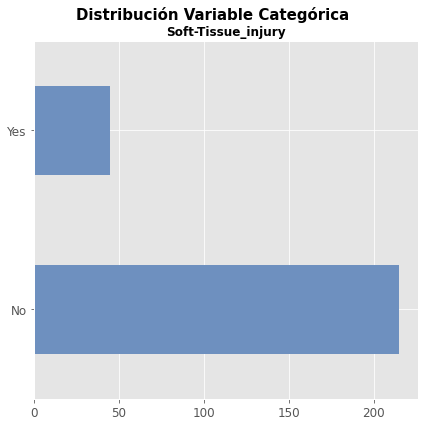

In [15]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 6))
ax = ax

data_modelo_4_csv["Soft-Tissue_injury_≥4days"].value_counts().plot.barh(ax = ax)
ax.set_title('Soft-Tissue_injury', fontsize = 12, fontweight = "bold")
ax.tick_params(labelsize = 12)
ax.set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución Variable Categórica', fontsize = 15, fontweight = "bold")

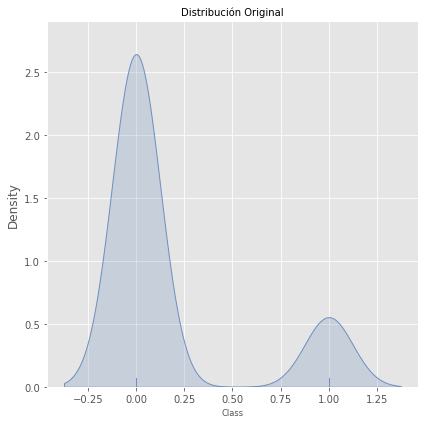

In [16]:
label_encoder = LabelEncoder()
data_modelo_4_csv_class_encoded = label_encoder.fit_transform(data_modelo_4_csv["Soft-Tissue_injury_≥4days"])

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 6))
sns.distplot(
    data_modelo_4_csv_class_encoded,
    hist = False,
    rug = True,
    kde_kws = {'shade': True, 'linewidth':1},
    ax = axes)

axes.set_title("Distribución Original", fontsize = 'medium')
axes.set_xlabel("Class", fontsize = 'small')
axes.tick_params(labelsize = 10)

fig.tight_layout()

### Variables Numericas

In [17]:
data_modelo_4_csv.select_dtypes(include = ['float64', 'int']).describe()

DVJ_Valgus_KneeMedialDisplacement_D_discr         BMI  ROM-PADF-KE_D  \
count                                 260.000000  260.000000     260.000000   
mean                                    0.911538   19.934551      30.307692   
std                                     0.788345    2.625108       4.516544   
min                                     0.000000   13.639753      20.000000   
25%                                     0.000000   18.252914      28.000000   
50%                                     1.000000   19.937457      30.000000   
75%                                     1.000000   21.647451      33.000000   
max                                     3.000000   27.268714      48.000000   

       DVJ_Valgus_FPPA_D_discr  TrainFrequency  DVJ_Valgus_FPPA_ND_discr  \
count               260.000000      260.000000                260.000000   
mean                  0.584615        3.134615                  0.473077   
std                   0.753726        0.577200                  0.677297   
min                   0.000000        2.000000                  0.000000   
25%                   0.000000        3.000000                  0.000000   
50%                   0.000000        3.000000                  0.000000   
75%                   1.000000        3.000000                  1.000000   
max                   3.000000        4.000000                  3.000000   

       TJ_Valgus_FPPA_ND_discr  TJ_Valgus_FPPA_D_discr  \
count               260.000000              260.000000   
mean                  1.423077                1.461538   
std                   0.784654                0.811632   
min                   0.000000                0.000000   
25%                   1.000000                1.000000   
50%                   1.000000                2.000000   
75%                   2.000000                2.000000   
max                   3.000000                3.000000   

       DVJ_Valgus_KneeMedialDisplacement_ND_discr  ROM-PHER_ND  POMStension  \
count                                  260.000000   260.000000   260.000000   
mean                                     1.111538    57.773077     5.192308   
std                                      0.795172     7.056203     2.675778   
min                                      0.000000    40.000000     0.000000   
25%                                      1.000000    54.000000     4.000000   
50%                                      1.000000    58.000000     5.000000   
75%                                      2.000000    62.000000     6.000000   
max                                      3.000000    80.000000    16.000000   

           STAI-R  ROM-PHER_D  ROM-PHIR_D  
count  260.000000  260.000000  260.000000  
mean    14.856923   58.157692   44.300000  
std      5.628018    7.198921    6.408428  
min      3.000000   40.000000   26.000000  
25%     11.000000   54.000000   40.000000  
50%     14.800000   58.000000   44.000000  
75%     17.250000   62.000000   48.000000  
max     37.000000   80.000000   64.000000

In [19]:
nums = data_modelo_4_csv.select_dtypes(include = ['float64', 'int']).columns

for colum in nums:
    if len(data_modelo_4_csv[colum].unique()) < 5:
        data_modelo_4_csv[colum] = data_modelo_4_csv[colum].apply(str)
        print(colum, "ha sido transformada a categorica por el bajo numero de valores")

DVJ_Valgus_KneeMedialDisplacement_D_discr ha sido transformada a categorica por el bajo numero de valores
DVJ_Valgus_FPPA_D_discr ha sido transformada a categorica por el bajo numero de valores
TrainFrequency ha sido transformada a categorica por el bajo numero de valores
DVJ_Valgus_FPPA_ND_discr ha sido transformada a categorica por el bajo numero de valores
TJ_Valgus_FPPA_ND_discr ha sido transformada a categorica por el bajo numero de valores
TJ_Valgus_FPPA_D_discr ha sido transformada a categorica por el bajo numero de valores
DVJ_Valgus_KneeMedialDisplacement_ND_discr ha sido transformada a categorica por el bajo numero de valores


Text(0.5, 0.98, 'Distribución Variables Numéricas')

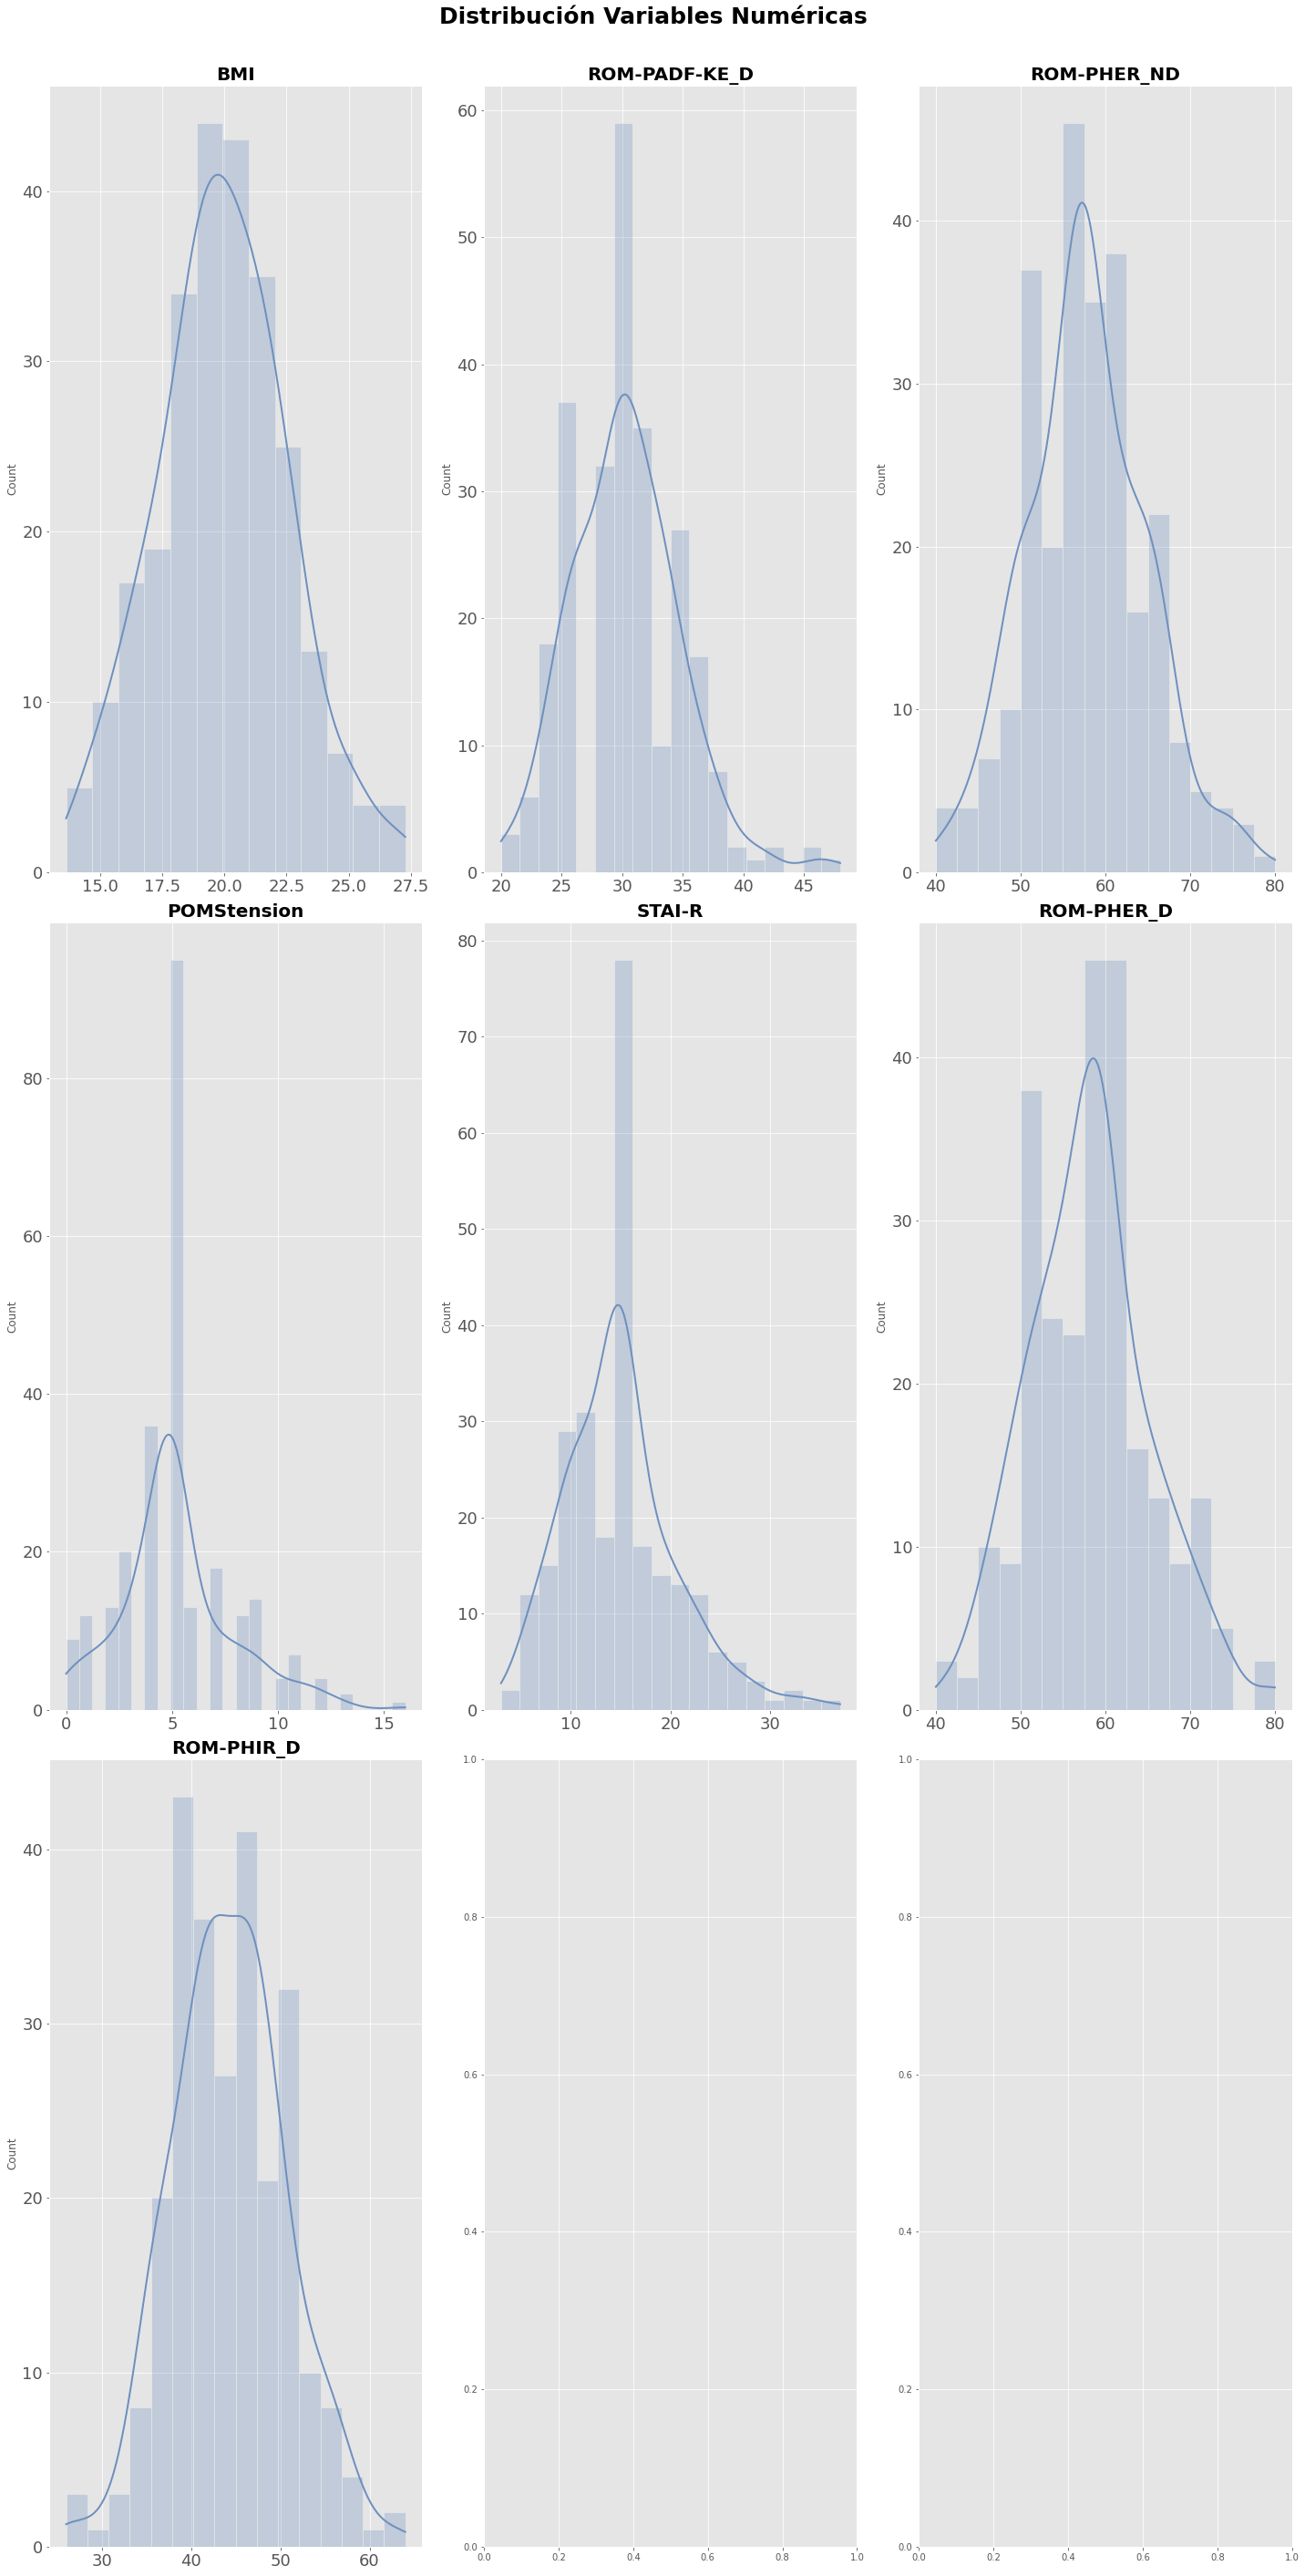

In [30]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 40))
axes = axes.flat
columnas_numeric = data_modelo_4_csv.select_dtypes(include = ['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    
    sns.histplot(
        data = data_modelo_4_csv,
        x = colum,
        stat = "count",
        kde = True,
        line_kws = {'linewidth': 2},
        alpha = 0.3,
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 20, fontweight = "bold")
    axes[i].tick_params(labelsize = 18)
    axes[i].set_xlabel("")
    
fig.tight_layout()
plt.subplots_adjust(top = 0.95)
fig.suptitle('Distribución Variables Numéricas', fontsize = 25, fontweight = "bold")

In [21]:
corr_matrix = data_modelo_4_csv[columnas_numeric].corr()
corr_matrix

BMI  ROM-PADF-KE_D  ROM-PHER_ND  POMStension    STAI-R  \
BMI            1.000000       0.175249    -0.010802    -0.023707  0.062074   
ROM-PADF-KE_D  0.175249       1.000000     0.041452     0.009781 -0.048143   
ROM-PHER_ND   -0.010802       0.041452     1.000000     0.079210  0.032449   
POMStension   -0.023707       0.009781     0.079210     1.000000  0.317446   
STAI-R         0.062074      -0.048143     0.032449     0.317446  1.000000   
ROM-PHER_D    -0.014926       0.080676     0.816278     0.011248 -0.047413   
ROM-PHIR_D    -0.393021       0.058694     0.110888     0.075430  0.041917   

               ROM-PHER_D  ROM-PHIR_D  
BMI             -0.014926   -0.393021  
ROM-PADF-KE_D    0.080676    0.058694  
ROM-PHER_ND      0.816278    0.110888  
POMStension      0.011248    0.075430  
STAI-R          -0.047413    0.041917  
ROM-PHER_D       1.000000    0.058559  
ROM-PHIR_D       0.058559    1.000000

In [22]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (250, 250))
sns.heatmap(
    corr_matrix,
    annot = True,
    cbar = False,
    annot_kws = {"size": 100},
    vmin = -1,
    vmax = 1,
    center = 0,
    cmap = sns.color_palette("vlag_r"),
    square = True,
    ax = ax)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right')

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation = 0,
    horizontalalignment = 'right')

ax.tick_params(labelsize = 180)

In [23]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
upper_tri

BMI  ROM-PADF-KE_D  ROM-PHER_ND  POMStension    STAI-R  \
BMI            NaN       0.175249    -0.010802    -0.023707  0.062074   
ROM-PADF-KE_D  NaN            NaN     0.041452     0.009781 -0.048143   
ROM-PHER_ND    NaN            NaN          NaN     0.079210  0.032449   
POMStension    NaN            NaN          NaN          NaN  0.317446   
STAI-R         NaN            NaN          NaN          NaN       NaN   
ROM-PHER_D     NaN            NaN          NaN          NaN       NaN   
ROM-PHIR_D     NaN            NaN          NaN          NaN       NaN   

               ROM-PHER_D  ROM-PHIR_D  
BMI             -0.014926   -0.393021  
ROM-PADF-KE_D    0.080676    0.058694  
ROM-PHER_ND      0.816278    0.110888  
POMStension      0.011248    0.075430  
STAI-R          -0.047413    0.041917  
ROM-PHER_D            NaN    0.058559  
ROM-PHIR_D            NaN         NaN

In [24]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

[]


In [25]:
data_modelo_4_csv = data_modelo_4_csv.drop(to_drop, axis = 1)
data_modelo_4_csv.head()

DVJ_Valgus_KneeMedialDisplacement_D_discr        BMI AgeGroup  \
0                                         0  18.716444   U17U19   
1                                         0  22.182267   U17U19   
2                                         1  25.352783   U17U19   
3                                         0  21.332873   U17U19   
4                                         0  23.085619   U17U19   

   ROM-PADF-KE_D DVJ_Valgus_FPPA_D_discr TrainFrequency  \
0             33                       0              4   
1             41                       0              4   
2             35                       0              4   
3             33                       0              4   
4             25                       0              4   

  DVJ_Valgus_FPPA_ND_discr Asym_SLCMJLanding-pVGRF(10percent)_discr  \
0                        0                   No_Bilateral_Asymmetry   
1                        0                   No_Bilateral_Asymmetry   
2                        0                   No_Bilateral_Asymmetry   
3                        0                   No_Bilateral_Asymmetry   
4                        1                   No_Bilateral_Asymmetry   

  Asym-ROM-PHIR(≥8)_discr Asym_TJ_Valgus_FPPA(10percent)_discr  ...  \
0  No_Bilateral_Asymmetry               No_Bilateral_Asymmetry  ...   
1  No_Bilateral_Asymmetry               No_Bilateral_Asymmetry  ...   
2  No_Bilateral_Asymmetry               No_Bilateral_Asymmetry  ...   
3  No_Bilateral_Asymmetry               No_Bilateral_Asymmetry  ...   
4  No_Bilateral_Asymmetry               No_Bilateral_Asymmetry  ...   

  Asym_SLCMJ-pLFT(10percent)_discr DominantLeg Asym-ROM-PADF-KF(≥8)_discr  \
0           No_Bilateral_Asymmetry       Right     No_Bilateral_Asymmetry   
1           No_Bilateral_Asymmetry       Right     No_Bilateral_Asymmetry   
2           No_Bilateral_Asymmetry       Right     No_Bilateral_Asymmetry   
3           No_Bilateral_Asymmetry       Right     No_Bilateral_Asymmetry   
4           No_Bilateral_Asymmetry        Left     No_Bilateral_Asymmetry   

  ROM-PHER_ND CPRDmentalskills POMStension STAI-R ROM-PHER_D ROM-PHIR_D  \
0          57               22           5   14.8         58         42   
1          57               22           5   14.8         58         42   
2          57               22           5   14.8         58         42   
3          57               22           5   14.8         58         42   
4          57               22           5   14.8         58         42   

  Soft-Tissue_injury_≥4days  
0                        No  
1                        No  
2                        No  
3                        No  
4                       Yes  

[5 rows x 43 columns]

### Variables Categoricas

In [26]:
data_modelo_4_csv.select_dtypes(include=['object']).describe()

DVJ_Valgus_KneeMedialDisplacement_D_discr AgeGroup  \
count                                        260      260   
unique                                         4        4   
top                                            1   U11U12   
freq                                         130       78   

       DVJ_Valgus_FPPA_D_discr TrainFrequency DVJ_Valgus_FPPA_ND_discr  \
count                      260            260                      260   
unique                       4              3                        4   
top                          0              3                        0   
freq                       146            169                      162   

       Asym_SLCMJLanding-pVGRF(10percent)_discr Asym-ROM-PHIR(≥8)_discr  \
count                                       260                     260   
unique                                        2                       2   
top                      No_Bilateral_Asymmetry  No_Bilateral_Asymmetry   
freq                                        165                     247   

       Asym_TJ_Valgus_FPPA(10percent)_discr TJ_Valgus_FPPA_ND_discr  \
count                                   260                     260   
unique                                    2                       4   
top                  No_Bilateral_Asymmetry                       2   
freq                                    249                     110   

       Asym-ROM-PHF-KE(≥8)_discr  ...  \
count                        260  ...   
unique                         2  ...   
top       No_Bilateral_Asymmetry  ...   
freq                         235  ...   

       Asym_SLCMJTakeOff-pVGRF(10percent)_discr Asym-ROM-PHADD(≥8)_discr  \
count                                       260                      260   
unique                                        2                        2   
top                      No_Bilateral_Asymmetry   No_Bilateral_Asymmetry   
freq                                        228                      250   

       Asym-YBTcomposite(10percent)_discr Asym_SingleHop(10percent)_discr  \
count                                 260                             260   
unique                                  2                               2   
top                No_Bilateral_Asymmetry          No_Bilateral_Asymmetry   
freq                                  253                             205   

       Asym_YBTpm(10percent)_discr Asym_DVJ_Valgus_FPPA(10percent)_discr  \
count                          260                                   260   
unique                           2                                     2   
top         No_Bilateral_Asymmetry                No_Bilateral_Asymmetry   
freq                           233                                   242   

       Asym_SLCMJ-pLFT(10percent)_discr DominantLeg  \
count                               260         260   
unique                                2           2   
top              No_Bilateral_Asymmetry       Right   
freq                                132         190   

       Asym-ROM-PADF-KF(≥8)_discr CPRDmentalskills  
count                         260              260  
unique                          2               18  
top        No_Bilateral_Asymmetry                ?  
freq                          254               78  

[4 rows x 35 columns]

Text(0.5, 0.98, 'Distribución Variables Categóricas')

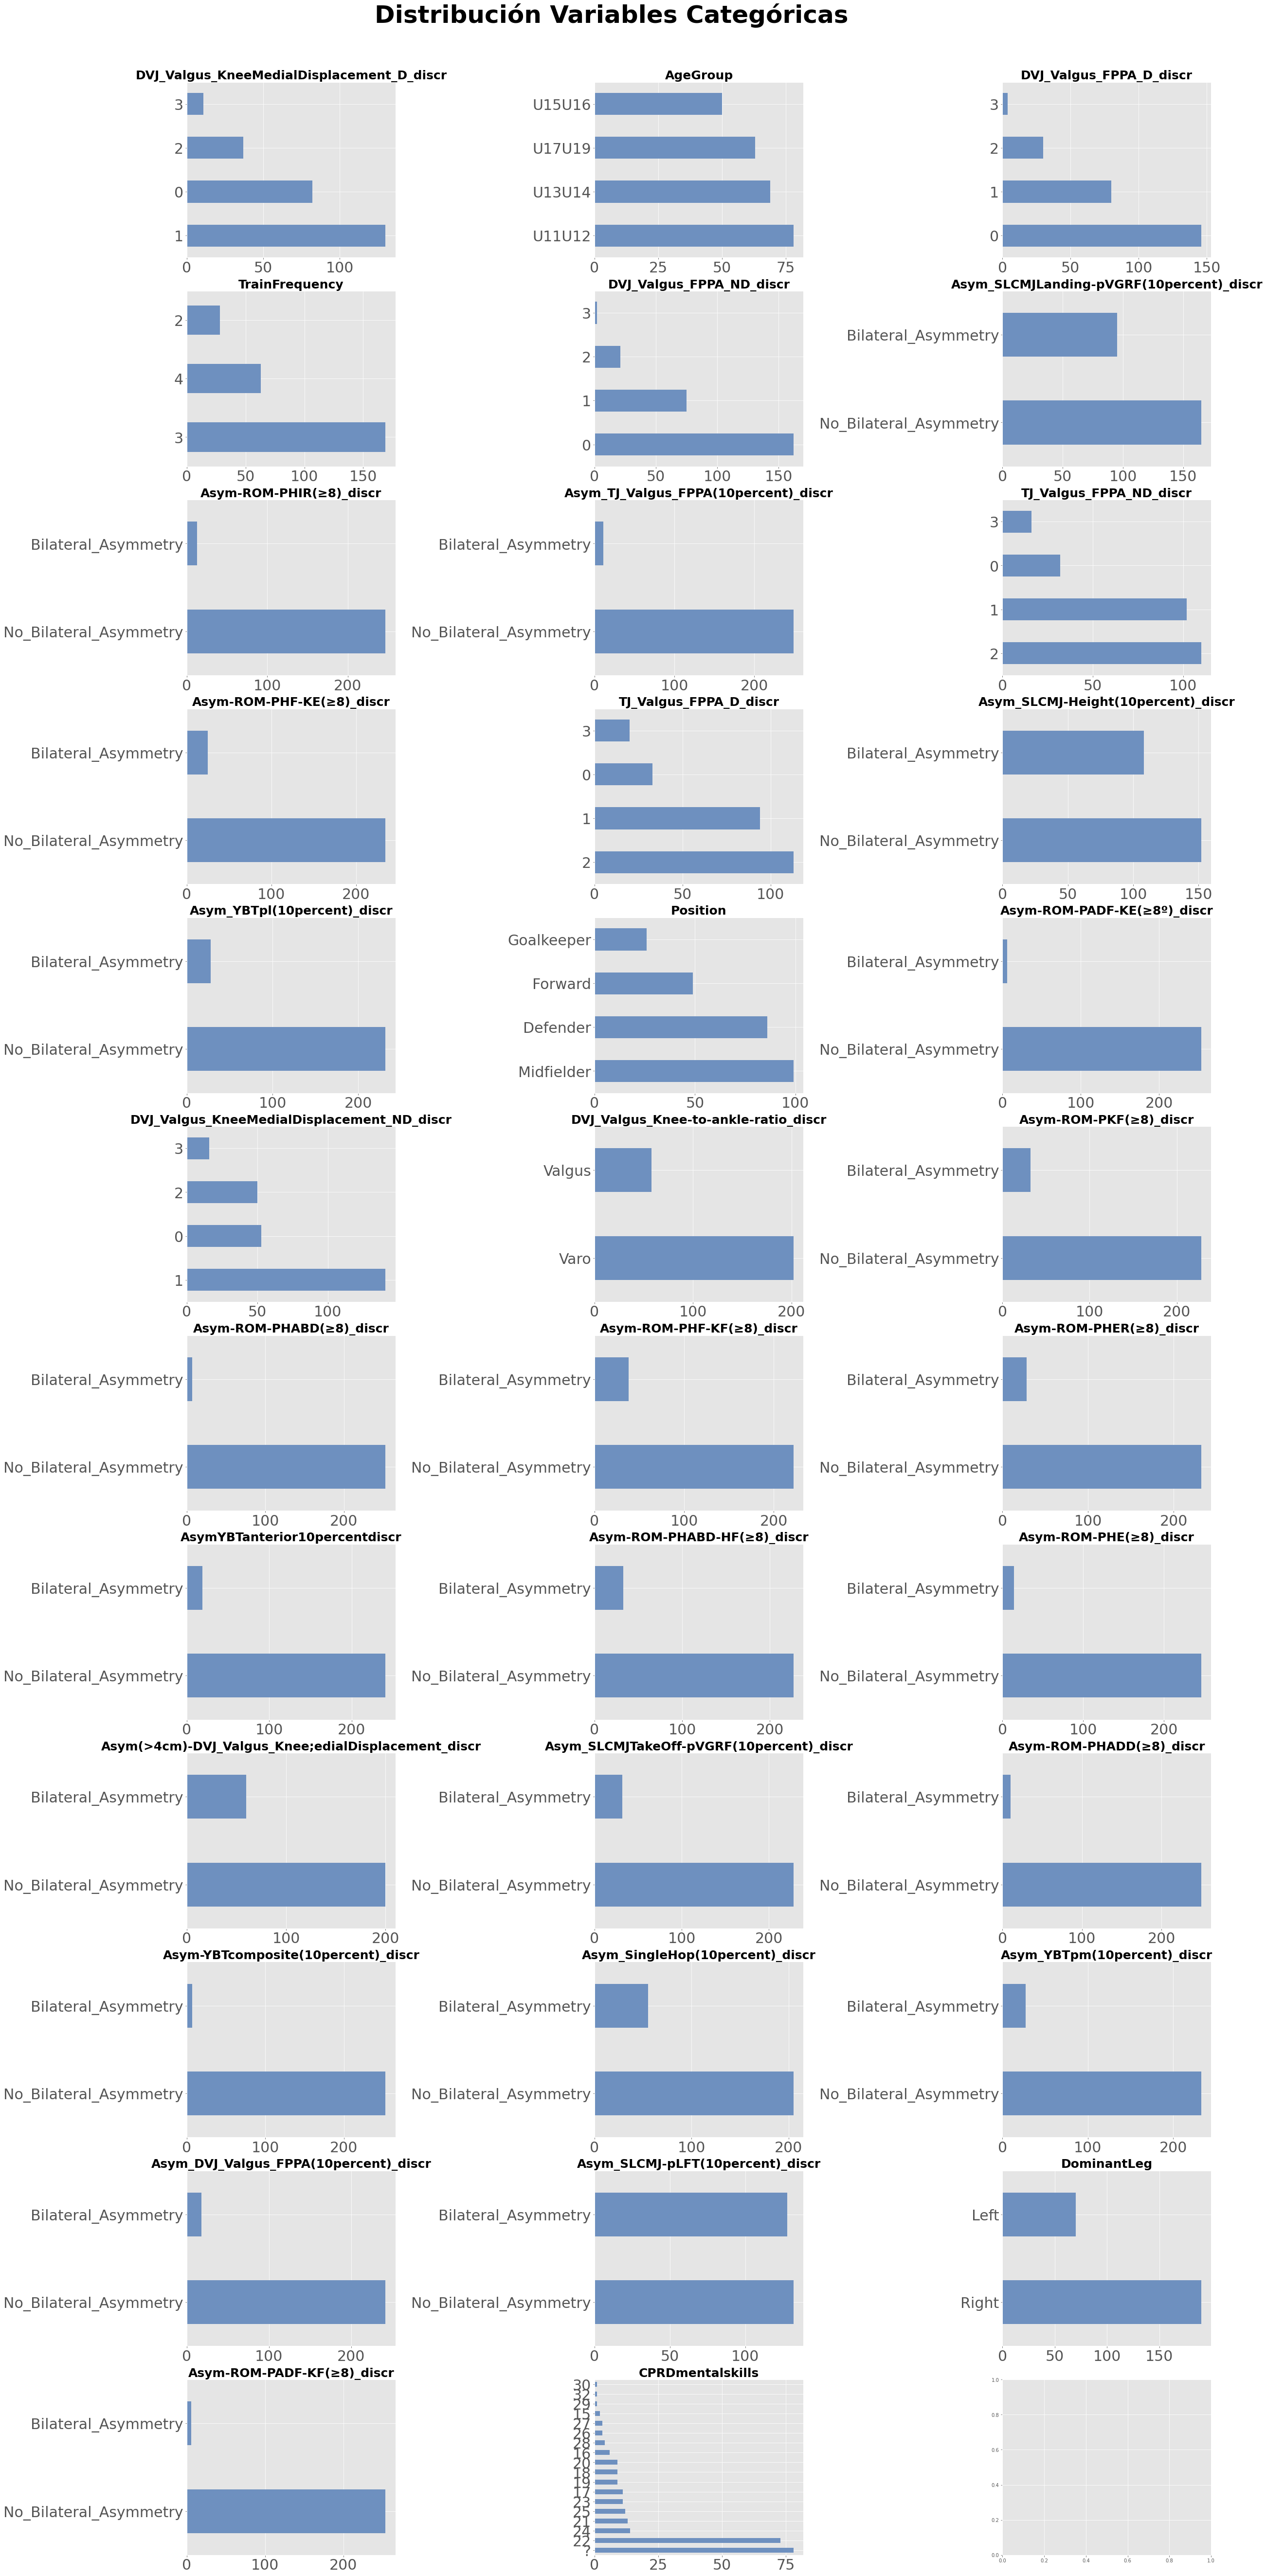

In [31]:
fig, axes = plt.subplots(nrows = 12, ncols = 3, figsize = (35, 75))
axes = axes.flat
columnas_object = data_modelo_4_csv.select_dtypes(include = ['object']).columns

for i, colum in enumerate(columnas_object):
        data_modelo_4_csv[colum].value_counts().plot.barh(ax = axes[i])
        axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
        axes[i].tick_params(labelsize = 30)
        axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top = 0.95)
fig.suptitle('Distribución Variables Categóricas', fontsize = 50, fontweight = "bold")

## VISUALIZACION DE LAS RELACIONES ENTRE LOS DATOS

In [32]:
filter1_Soft_Tissue_injury = data_modelo_4_csv["Soft-Tissue_injury_≥4days"].isin(["No"])
filter2_Soft_Tissue_injury = data_modelo_4_csv["Soft-Tissue_injury_≥4days"].isin(["Yes"])

Yes_injury = data_modelo_4_csv[filter2_Soft_Tissue_injury]
No_injury = data_modelo_4_csv[filter1_Soft_Tissue_injury]

In [33]:
def funcion_No_injury(a, colum):
    x = []
    for i in a:
        x.append(No_injury[colum].value_counts()[i])
    return x

def funcion_Yes_injury(a, colum):
    x = []
    for i in a:
        x.append(Yes_injury[colum].value_counts()[i])
    return x

### Relacion Entre Variables Categoricas y la Clase

Text(0.5, 0.98, 'Distribución Variables Categóricas con respecto la clase')

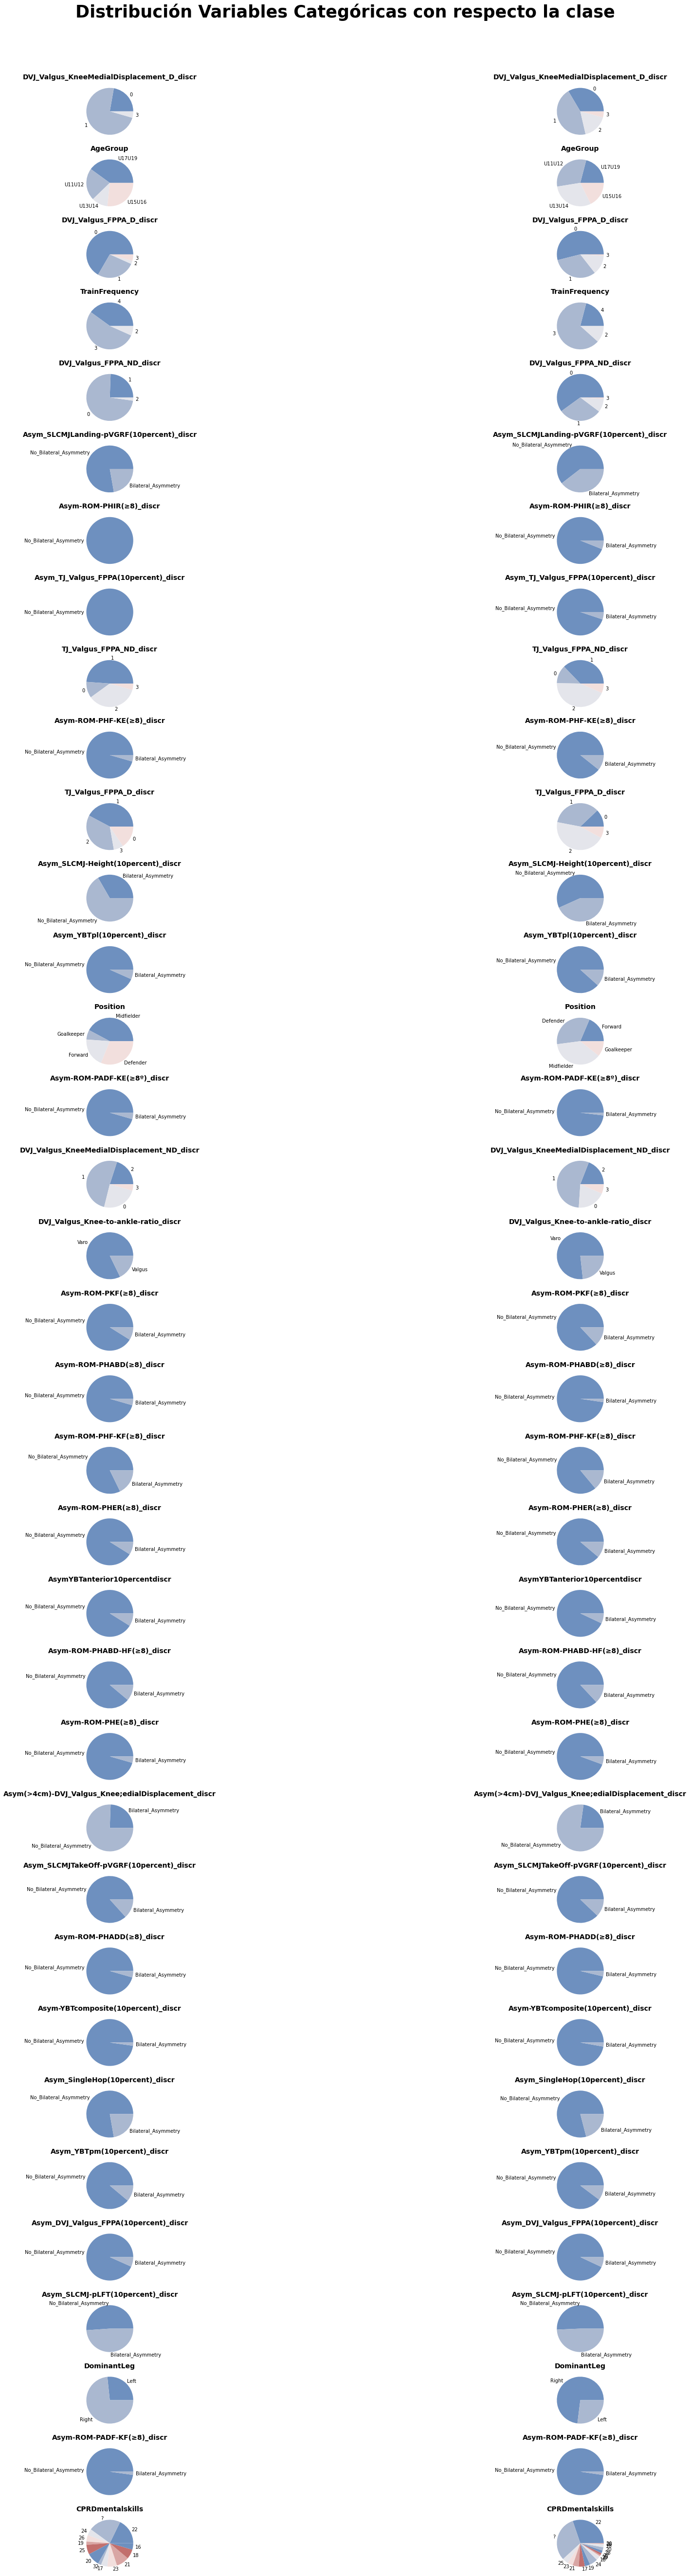

In [41]:
fig, axes = plt.subplots(nrows = 35, ncols = 2, figsize = (35, 75))
axes = axes.flat


columnas_object = data_modelo_4_csv.select_dtypes(include = ['object']).columns

for i, colum in enumerate(columnas_object):
    
    yes = funcion_Yes_injury(Yes_injury[colum].unique(), colum)
    no = funcion_No_injury(No_injury[colum].unique(), colum)  
    
    axes[i*2].pie(yes, labels = Yes_injury[colum].unique())
    axes[i*2].set_title(colum, fontsize = 14, fontweight = "bold")
    axes[i*2].tick_params(labelsize = 15)
    axes[i*2].set_xlabel("")
            
    axes[(i*2)+1].pie(no, labels = No_injury[colum].unique())
    axes[(i*2)+1].set_title(colum, fontsize = 14, fontweight = "bold")
    axes[(i*2)+1].tick_params(labelsize = 15)
    axes[(i*2)+1].set_xlabel("")    

fig.tight_layout()
plt.subplots_adjust(top = 0.95)
fig.suptitle('Distribución Variables Categóricas con respecto la clase', fontsize = 35, fontweight = "bold")

### Relacion Entre Variables Numericas y la Clase

Text(0.5, 0.98, 'Distribución Variables Numéricas con respecto la clase')

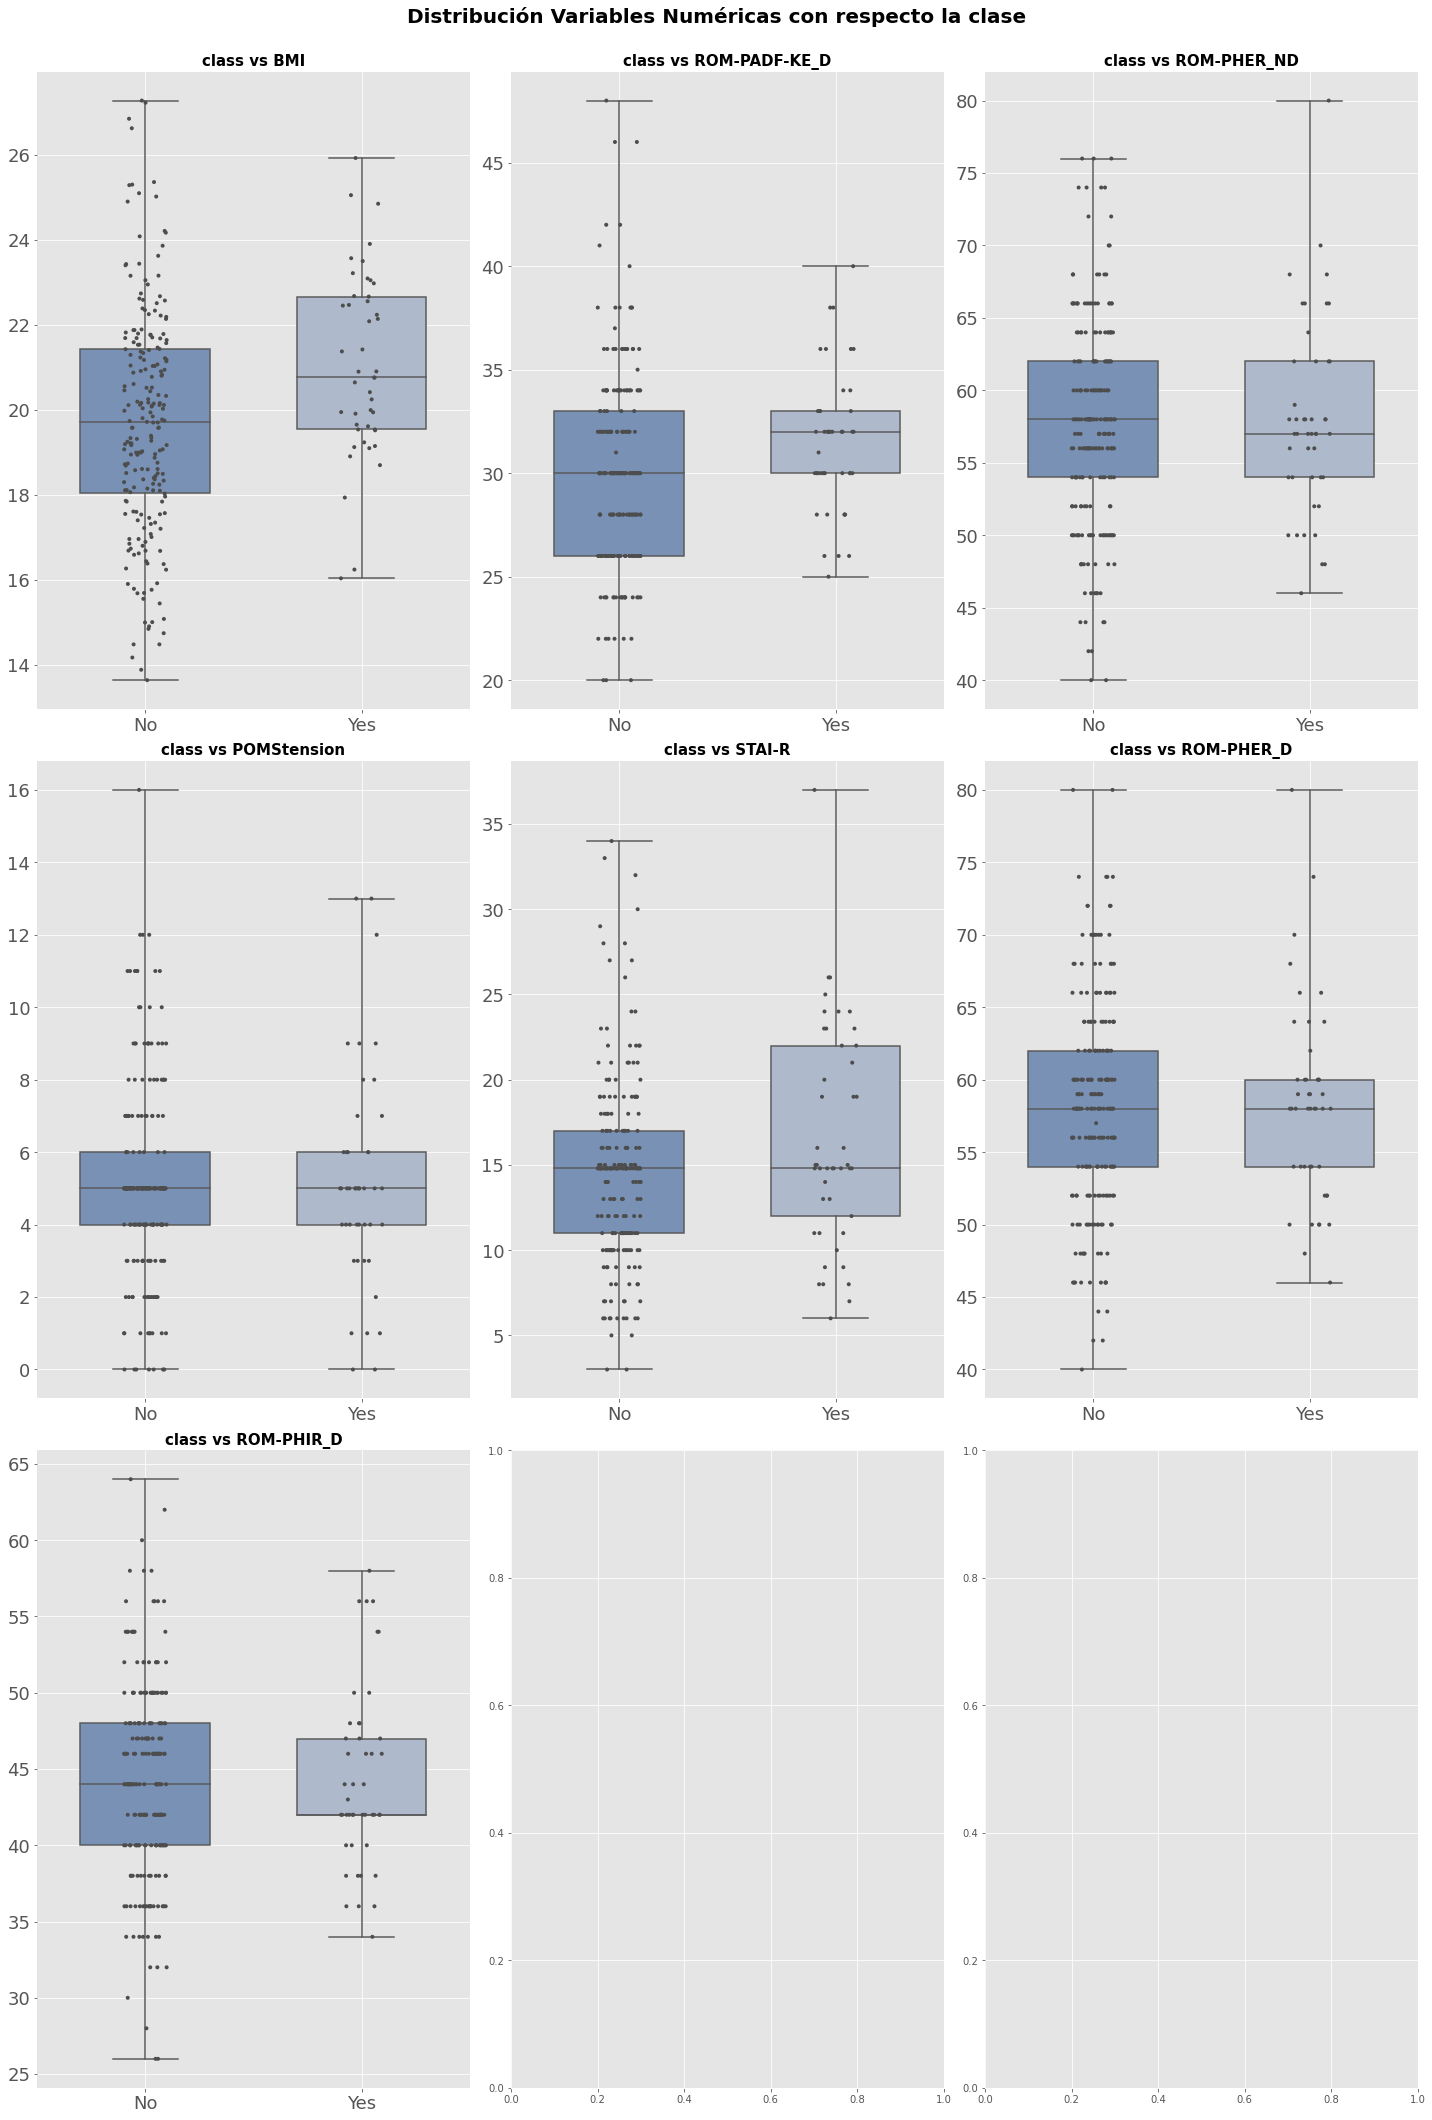

In [36]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 30))
axes = axes.flat
columnas_numeric = data_modelo_4_csv.select_dtypes(include = ['float64', 'int']).columns


for i, colum in enumerate(columnas_numeric):
    sns.boxplot(x="Soft-Tissue_injury_≥4days", y=colum,data = data_modelo_4_csv,
                whis=[0, 100], width=.6, ax = axes[i])

    sns.stripplot(x="Soft-Tissue_injury_≥4days", y=colum,data = data_modelo_4_csv,
                  size=4, color=".3", linewidth=0, ax = axes[i])
    
    axes[i].set_title(f"class vs {colum}", fontsize = 15, fontweight = "bold")
    axes[i].yaxis.grid(True)
    axes[i].xaxis.grid(True)
    axes[i].tick_params(labelsize = 18)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
sns.despine(trim=True, left=True)

fig.tight_layout()
plt.subplots_adjust(top = 0.95)
fig.suptitle('Distribución Variables Numéricas con respecto la clase', fontsize = 20, fontweight = "bold")

## Preprocesamiento

In [42]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [43]:
data_modelo_4_csv = data_modelo_4_csv.replace({'?': '-1'})
X = data_modelo_4_csv.drop('Soft-Tissue_injury_≥4days', axis = 'columns')
y = data_modelo_4_csv['Soft-Tissue_injury_≥4days']

### Binarización de las variables cualitativas

In [44]:
cat_cols = X.select_dtypes(include=['object', 'category'])
numeric_cols = X.select_dtypes(include=['float64', 'int'])

In [45]:
cat_cols

DVJ_Valgus_KneeMedialDisplacement_D_discr AgeGroup  \
0                                           0   U17U19   
1                                           0   U17U19   
2                                           1   U17U19   
3                                           0   U17U19   
4                                           0   U17U19   
..                                        ...      ...   
255                                         0   U17U19   
256                                         1   U17U19   
257                                         0   U17U19   
258                                         1   U17U19   
259                                         0   U17U19   

    DVJ_Valgus_FPPA_D_discr TrainFrequency DVJ_Valgus_FPPA_ND_discr  \
0                         0              4                        0   
1                         0              4                        0   
2                         0              4                        0   
3                         0              4                        0   
4                         0              4                        1   
..                      ...            ...                      ...   
255                       0              4                        2   
256                       0              4                        0   
257                       0              4                        0   
258                       0              4                        0   
259                       0              4                        1   

    Asym_SLCMJLanding-pVGRF(10percent)_discr Asym-ROM-PHIR(≥8)_discr  \
0                     No_Bilateral_Asymmetry  No_Bilateral_Asymmetry   
1                     No_Bilateral_Asymmetry  No_Bilateral_Asymmetry   
2                     No_Bilateral_Asymmetry  No_Bilateral_Asymmetry   
3                     No_Bilateral_Asymmetry  No_Bilateral_Asymmetry   
4                     No_Bilateral_Asymmetry  No_Bilateral_Asymmetry   
..                                       ...                     ...   
255                   No_Bilateral_Asymmetry  No_Bilateral_Asymmetry   
256                   No_Bilateral_Asymmetry  No_Bilateral_Asymmetry   
257                      Bilateral_Asymmetry  No_Bilateral_Asymmetry   
258                      Bilateral_Asymmetry  No_Bilateral_Asymmetry   
259                   No_Bilateral_Asymmetry  No_Bilateral_Asymmetry   

    Asym_TJ_Valgus_FPPA(10percent)_discr TJ_Valgus_FPPA_ND_discr  \
0                 No_Bilateral_Asymmetry                       1   
1                 No_Bilateral_Asymmetry                       1   
2                 No_Bilateral_Asymmetry                       0   
3                 No_Bilateral_Asymmetry                       1   
4                 No_Bilateral_Asymmetry                       1   
..                                   ...                     ...   
255                  Bilateral_Asymmetry                       2   
256               No_Bilateral_Asymmetry                       1   
257               No_Bilateral_Asymmetry                       1   
258               No_Bilateral_Asymmetry                       0   
259               No_Bilateral_Asymmetry                       1   

    Asym-ROM-PHF-KE(≥8)_discr  ... Asym_SLCMJTakeOff-pVGRF(10percent)_discr  \
0      No_Bilateral_Asymmetry  ...                   No_Bilateral_Asymmetry   
1      No_Bilateral_Asymmetry  ...                   No_Bilateral_Asymmetry   
2      No_Bilateral_Asymmetry  ...                   No_Bilateral_Asymmetry   
3      No_Bilateral_Asymmetry  ...                   No_Bilateral_Asymmetry   
4      No_Bilateral_Asymmetry  ...                   No_Bilateral_Asymmetry   
..                        ...  ...                                      ...   
255    No_Bilateral_Asymmetry  ...                   No_Bilateral_Asymmetry   
256    No_Bilateral_Asymmetry  ...                   No_Bilateral_Asymmetry   
257    No_Bilateral_Asymmetry  ...                   No_Bilat

In [46]:
encoder = OneHotEncoder(categories = 'auto', drop = 'first', handle_unknown = 'ignore')
cat_cols_encoded_DF = pd.DataFrame(encoder.fit_transform(cat_cols).toarray(), columns = encoder.get_feature_names_out())
cat_cols_encoded_DF

DVJ_Valgus_KneeMedialDisplacement_D_discr_1  \
0                                            0.0   
1                                            0.0   
2                                            1.0   
3                                            0.0   
4                                            0.0   
..                                           ...   
255                                          0.0   
256                                          1.0   
257                                          0.0   
258                                          1.0   
259                                          0.0   

     DVJ_Valgus_KneeMedialDisplacement_D_discr_2  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
..                                           ...   
255                                          0.0   
256                                          0.0   
257                                          0.0   
258                                          0.0   
259                                          0.0   

     DVJ_Valgus_KneeMedialDisplacement_D_discr_3  AgeGroup_U13U14  \
0                                            0.0              0.0   
1                                            0.0              0.0   
2                                            0.0              0.0   
3                                            0.0              0.0   
4                                            0.0              0.0   
..                                           ...              ...   
255                                          0.0              0.0   
256                                          0.0              0.0   
257                                          0.0              0.0   
258                                          0.0              0.0   
259                                          0.0              0.0   

     AgeGroup_U15U16  AgeGroup_U17U19  DVJ_Valgus_FPPA_D_discr_1  \
0                0.0              1.0                        0.0   
1                0.0              1.0                        0.0   
2                0.0              1.0                        0.0   
3                0.0              1.0                        0.0   
4                0.0              1.0                        0.0   
..               ...              ...                        ...   
255              0.0              1.0                        0.0   
256              0.0              1.0                        0.0   
257              0.0              1.0                        0.0   
258              0.0              1.0                        0.0   
259              0.0              1.0                        0.0   

     DVJ_Valgus_FPPA_D_discr_2  DVJ_Valgus_FPPA_D_discr_3  TrainFrequency_3  \
0                          0.0                        0.0               0.0   
1                          0.0                        0.0               0.0   
2                          0.0                        0.0               0.0   
3                          0.0                        0.0               0.0   
4                          0.0                        0.0               0.0   
..                         ...                        ...               ...   
255                        0.0                        0.0               0.0   
256                        0.0                        0.0               0.0   
257                        0.0                        0.0               0.0   
258                        0.0                        0.0               0.0   
259                        0.0                        0.0               0.0   

     ...  CPRDmentalskills_22  CPRDmentalskills_23  CPRDmentalskills_24  \
0    ...                  1.0                  0.0                  0.0   
1    ...  

In [47]:
X_numeric = pd.concat([cat_cols_encoded_DF, numeric_cols], axis = 1)
X_numeric

DVJ_Valgus_KneeMedialDisplacement_D_discr_1  \
0                                            0.0   
1                                            0.0   
2                                            1.0   
3                                            0.0   
4                                            0.0   
..                                           ...   
255                                          0.0   
256                                          1.0   
257                                          0.0   
258                                          1.0   
259                                          0.0   

     DVJ_Valgus_KneeMedialDisplacement_D_discr_2  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
..                                           ...   
255                                          0.0   
256                                          0.0   
257                                          0.0   
258                                          0.0   
259                                          0.0   

     DVJ_Valgus_KneeMedialDisplacement_D_discr_3  AgeGroup_U13U14  \
0                                            0.0              0.0   
1                                            0.0              0.0   
2                                            0.0              0.0   
3                                            0.0              0.0   
4                                            0.0              0.0   
..                                           ...              ...   
255                                          0.0              0.0   
256                                          0.0              0.0   
257                                          0.0              0.0   
258                                          0.0              0.0   
259                                          0.0              0.0   

     AgeGroup_U15U16  AgeGroup_U17U19  DVJ_Valgus_FPPA_D_discr_1  \
0                0.0              1.0                        0.0   
1                0.0              1.0                        0.0   
2                0.0              1.0                        0.0   
3                0.0              1.0                        0.0   
4                0.0              1.0                        0.0   
..               ...              ...                        ...   
255              0.0              1.0                        0.0   
256              0.0              1.0                        0.0   
257              0.0              1.0                        0.0   
258              0.0              1.0                        0.0   
259              0.0              1.0                        0.0   

     DVJ_Valgus_FPPA_D_discr_2  DVJ_Valgus_FPPA_D_discr_3  TrainFrequency_3  \
0                          0.0                        0.0               0.0   
1                          0.0                        0.0               0.0   
2                          0.0                        0.0               0.0   
3                          0.0                        0.0               0.0   
4                          0.0                        0.0               0.0   
..                         ...                        ...               ...   
255                        0.0                        0.0               0.0   
256                        0.0                        0.0               0.0   
257                        0.0                        0.0               0.0   
258                        0.0                        0.0               0.0   
259                        0.0                        0.0               0.0   

     ...  CPRDmentalskills_29  CPRDmentalskills_30  CPRDmentalskills_32  \
0    ...                  0.0                  0.0                  0.0   
1    ...  

In [48]:
le = LabelEncoder()
y_binary = le.fit_transform(y)
y_binary = pd.DataFrame(y_binary, columns = [y.name])
y_binary

Soft-Tissue_injury_≥4days
0                            0
1                            0
2                            0
3                            0
4                            1
..                         ...
255                          0
256                          1
257                          0
258                          0
259                          0

[260 rows x 1 columns]

In [49]:
# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        X_numeric,
                                        y_binary,
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True,
                                        stratify = y_binary
                                    )

### Estandarización y escalado de variables numéricas

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()
X_train[:] = scaler.fit_transform(X_train)
X_train

DVJ_Valgus_KneeMedialDisplacement_D_discr_1  \
127                                          1.0   
219                                          1.0   
121                                          1.0   
204                                          0.0   
100                                          1.0   
..                                           ...   
252                                          1.0   
89                                           0.0   
31                                           0.0   
224                                          1.0   
194                                          1.0   

     DVJ_Valgus_KneeMedialDisplacement_D_discr_2  \
127                                          0.0   
219                                          0.0   
121                                          0.0   
204                                          1.0   
100                                          0.0   
..                                           ...   
252                                          0.0   
89                                           0.0   
31                                           0.0   
224                                          0.0   
194                                          0.0   

     DVJ_Valgus_KneeMedialDisplacement_D_discr_3  AgeGroup_U13U14  \
127                                          0.0              0.0   
219                                          0.0              0.0   
121                                          0.0              0.0   
204                                          0.0              1.0   
100                                          0.0              1.0   
..                                           ...              ...   
252                                          0.0              0.0   
89                                           1.0              1.0   
31                                           0.0              0.0   
224                                          0.0              0.0   
194                                          0.0              1.0   

     AgeGroup_U15U16  AgeGroup_U17U19  DVJ_Valgus_FPPA_D_discr_1  \
127              1.0              0.0                        0.0   
219              1.0              0.0                        1.0   
121              1.0              0.0                        1.0   
204              0.0              0.0                        0.0   
100              0.0              0.0                        1.0   
..               ...              ...                        ...   
252              0.0              1.0                        0.0   
89               0.0              0.0                        0.0   
31               0.0              0.0                        0.0   
224              0.0              0.0                        0.0   
194              0.0              0.0                        1.0   

     DVJ_Valgus_FPPA_D_discr_2  DVJ_Valgus_FPPA_D_discr_3  TrainFrequency_3  \
127                        0.0                        0.0               1.0   
219                        0.0                        0.0               1.0   
121                        0.0                        0.0               1.0   
204                        0.0                        0.0               1.0   
100                        0.0                        0.0               1.0   
..                         ...                        ...               ...   
252                        0.0                        0.0               0.0   
89                         1.0                        0.0               1.0   
31                         0.0                        0.0               0.0   
224                        0.0                        0.0               0.0   
194                        0.0                        0.0               1.0   

     ...  CPRDmentalskills_29  CPRDmentalskills_30  CPRDmentalskills_32  \
127  ...                  0.0                  0.0                  0.0   
219  ...  

In [52]:
X_test[:] = scaler.transform(X_test)
X_test

DVJ_Valgus_KneeMedialDisplacement_D_discr_1  \
202                                          0.0   
185                                          0.0   
247                                          1.0   
255                                          0.0   
138                                          1.0   
..                                           ...   
94                                           1.0   
256                                          1.0   
220                                          0.0   
36                                           1.0   
99                                           0.0   

     DVJ_Valgus_KneeMedialDisplacement_D_discr_2  \
202                                          0.0   
185                                          1.0   
247                                          0.0   
255                                          0.0   
138                                          0.0   
..                                           ...   
94                                           0.0   
256                                          0.0   
220                                          0.0   
36                                           0.0   
99                                           0.0   

     DVJ_Valgus_KneeMedialDisplacement_D_discr_3  AgeGroup_U13U14  \
202                                          0.0              1.0   
185                                          0.0              0.0   
247                                          0.0              0.0   
255                                          0.0              0.0   
138                                          0.0              0.0   
..                                           ...              ...   
94                                           0.0              1.0   
256                                          0.0              0.0   
220                                          0.0              0.0   
36                                           0.0              0.0   
99                                           0.0              1.0   

     AgeGroup_U15U16  AgeGroup_U17U19  DVJ_Valgus_FPPA_D_discr_1  \
202              0.0              0.0                        0.0   
185              0.0              0.0                        1.0   
247              0.0              1.0                        1.0   
255              0.0              1.0                        0.0   
138              1.0              0.0                        0.0   
..               ...              ...                        ...   
94               0.0              0.0                        1.0   
256              0.0              1.0                        0.0   
220              1.0              0.0                        0.0   
36               0.0              0.0                        0.0   
99               0.0              0.0                        0.0   

     DVJ_Valgus_FPPA_D_discr_2  DVJ_Valgus_FPPA_D_discr_3  TrainFrequency_3  \
202                        0.0                        0.0               1.0   
185                        0.0                        0.0               1.0   
247                        0.0                        0.0               0.0   
255                        0.0                        0.0               0.0   
138                        0.0                        0.0               1.0   
..                         ...                        ...               ...   
94                         0.0                        0.0               1.0   
256                        0.0                        0.0               0.0   
220                        0.0                        0.0               1.0   
36                         0.0                        0.0               0.0   
99                         0.0                        0.0               1.0   

     ...  CPRDmentalskills_29  CPRDmentalskills_30  CPRDmentalskills_32  \
202  ...                  0.0                  0.0                  0.0   
185  ...  

### Imputación de valores ausentes

In [53]:
X_train.isna().sum().sort_values()

DVJ_Valgus_KneeMedialDisplacement_D_discr_1          0
CPRDmentalskills_17                                  0
CPRDmentalskills_16                                  0
CPRDmentalskills_15                                  0
Asym-ROM-PADF-KF(≥8)_discr_No_Bilateral_Asymmetry    0
                                                    ..
TJ_Valgus_FPPA_D_discr_2                             0
TJ_Valgus_FPPA_D_discr_1                             0
Asym-ROM-PHF-KE(≥8)_discr_No_Bilateral_Asymmetry     0
TJ_Valgus_FPPA_ND_discr_2                            0
ROM-PHIR_D                                           0
Length: 75, dtype: int64

In [54]:
X_test.isna().sum().sort_values()

DVJ_Valgus_KneeMedialDisplacement_D_discr_1          0
CPRDmentalskills_17                                  0
CPRDmentalskills_16                                  0
CPRDmentalskills_15                                  0
Asym-ROM-PADF-KF(≥8)_discr_No_Bilateral_Asymmetry    0
                                                    ..
TJ_Valgus_FPPA_D_discr_2                             0
TJ_Valgus_FPPA_D_discr_1                             0
Asym-ROM-PHF-KE(≥8)_discr_No_Bilateral_Asymmetry     0
TJ_Valgus_FPPA_ND_discr_2                            0
ROM-PHIR_D                                           0
Length: 75, dtype: int64

In [55]:
y_train.isna().sum().sort_values()

Soft-Tissue_injury_≥4days    0
dtype: int64

In [56]:
y_test.isna().sum().sort_values()

Soft-Tissue_injury_≥4days    0
dtype: int64

### Exclusión de variables con varianza próxima a cero

In [57]:
from sklearn.feature_selection import VarianceThreshold

In [58]:
selector = VarianceThreshold(threshold=0.0)
selector.fit_transform(X_train)
X_train = X_train[X_train.columns[selector.get_support(indices = True)]]
X_train

DVJ_Valgus_KneeMedialDisplacement_D_discr_1  \
127                                          1.0   
219                                          1.0   
121                                          1.0   
204                                          0.0   
100                                          1.0   
..                                           ...   
252                                          1.0   
89                                           0.0   
31                                           0.0   
224                                          1.0   
194                                          1.0   

     DVJ_Valgus_KneeMedialDisplacement_D_discr_2  \
127                                          0.0   
219                                          0.0   
121                                          0.0   
204                                          1.0   
100                                          0.0   
..                                           ...   
252                                          0.0   
89                                           0.0   
31                                           0.0   
224                                          0.0   
194                                          0.0   

     DVJ_Valgus_KneeMedialDisplacement_D_discr_3  AgeGroup_U13U14  \
127                                          0.0              0.0   
219                                          0.0              0.0   
121                                          0.0              0.0   
204                                          0.0              1.0   
100                                          0.0              1.0   
..                                           ...              ...   
252                                          0.0              0.0   
89                                           1.0              1.0   
31                                           0.0              0.0   
224                                          0.0              0.0   
194                                          0.0              1.0   

     AgeGroup_U15U16  AgeGroup_U17U19  DVJ_Valgus_FPPA_D_discr_1  \
127              1.0              0.0                        0.0   
219              1.0              0.0                        1.0   
121              1.0              0.0                        1.0   
204              0.0              0.0                        0.0   
100              0.0              0.0                        1.0   
..               ...              ...                        ...   
252              0.0              1.0                        0.0   
89               0.0              0.0                        0.0   
31               0.0              0.0                        0.0   
224              0.0              0.0                        0.0   
194              0.0              0.0                        1.0   

     DVJ_Valgus_FPPA_D_discr_2  DVJ_Valgus_FPPA_D_discr_3  TrainFrequency_3  \
127                        0.0                        0.0               1.0   
219                        0.0                        0.0               1.0   
121                        0.0                        0.0               1.0   
204                        0.0                        0.0               1.0   
100                        0.0                        0.0               1.0   
..                         ...                        ...               ...   
252                        0.0                        0.0               0.0   
89                         1.0                        0.0               1.0   
31                         0.0                        0.0               0.0   
224                        0.0                        0.0               0.0   
194                        0.0                        0.0               1.0   

     ...  CPRDmentalskills_27  CPRDmentalskills_28  CPRDmentalskills_30  \
127  ...                  0.0                  0.0                  0.0   
219  ...  

In [59]:
selector.transform(X_test)
X_test = X_test[X_test.columns[selector.get_support(indices = True)]]
X_test

DVJ_Valgus_KneeMedialDisplacement_D_discr_1  \
202                                          0.0   
185                                          0.0   
247                                          1.0   
255                                          0.0   
138                                          1.0   
..                                           ...   
94                                           1.0   
256                                          1.0   
220                                          0.0   
36                                           1.0   
99                                           0.0   

     DVJ_Valgus_KneeMedialDisplacement_D_discr_2  \
202                                          0.0   
185                                          1.0   
247                                          0.0   
255                                          0.0   
138                                          0.0   
..                                           ...   
94                                           0.0   
256                                          0.0   
220                                          0.0   
36                                           0.0   
99                                           0.0   

     DVJ_Valgus_KneeMedialDisplacement_D_discr_3  AgeGroup_U13U14  \
202                                          0.0              1.0   
185                                          0.0              0.0   
247                                          0.0              0.0   
255                                          0.0              0.0   
138                                          0.0              0.0   
..                                           ...              ...   
94                                           0.0              1.0   
256                                          0.0              0.0   
220                                          0.0              0.0   
36                                           0.0              0.0   
99                                           0.0              1.0   

     AgeGroup_U15U16  AgeGroup_U17U19  DVJ_Valgus_FPPA_D_discr_1  \
202              0.0              0.0                        0.0   
185              0.0              0.0                        1.0   
247              0.0              1.0                        1.0   
255              0.0              1.0                        0.0   
138              1.0              0.0                        0.0   
..               ...              ...                        ...   
94               0.0              0.0                        1.0   
256              0.0              1.0                        0.0   
220              1.0              0.0                        0.0   
36               0.0              0.0                        0.0   
99               0.0              0.0                        0.0   

     DVJ_Valgus_FPPA_D_discr_2  DVJ_Valgus_FPPA_D_discr_3  TrainFrequency_3  \
202                        0.0                        0.0               1.0   
185                        0.0                        0.0               1.0   
247                        0.0                        0.0               0.0   
255                        0.0                        0.0               0.0   
138                        0.0                        0.0               1.0   
..                         ...                        ...               ...   
94                         0.0                        0.0               1.0   
256                        0.0                        0.0               0.0   
220                        0.0                        0.0               1.0   
36                         0.0                        0.0               0.0   
99                         0.0                        0.0               1.0   

     ...  CPRDmentalskills_27  CPRDmentalskills_28  CPRDmentalskills_30  \
202  ...                  0.0                  0.0                  0.0   
185  ...  

In [60]:
Data_train = pd.concat([X_train, y_train], axis = 1)
Data_test = pd.concat([X_test, y_test], axis = 1)

In [61]:
Data_train.to_csv(r'/home/pablo/Escritorio/TFG/Bases de Datos, Modelos y Esquemas/data_modelo_4_csv_encoded_train.csv', index = False)
Data_test.to_csv(r'/home/pablo/Escritorio/TFG/Bases de Datos, Modelos y Esquemas/data_modelo_4_csv_encoded_test.csv', index = False)

In [71]:
data_train_modelo_4_arff_encoded = converters.load_any_file("/home/pablo/Escritorio/TFG/Bases de Datos, Modelos y Esquemas/data_modelo_4_csv_encoded_train.csv")
data_train_modelo_4_arff_encoded.class_is_last()

f = Filter(classname="weka.filters.unsupervised.attribute.NumericToNominal", options=["-R", "74"])
f.inputformat(data_train_modelo_4_arff_encoded)
data_train_modelo_4_arff_encoded = f.filter(data_train_modelo_4_arff_encoded)

save_any_file(data_train_modelo_4_arff_encoded, "/home/pablo/Escritorio/TFG/Bases de Datos, Modelos y Esquemas/data_train_modelo_4_arff_encoded.arff")

@relation data_modelo_4_csv_encoded_train-weka.filters.unsupervised.attribute.NumericToNominal-R74

@attribute DVJ_Valgus_KneeMedialDisplacement_D_discr_1 numeric
@attribute DVJ_Valgus_KneeMedialDisplacement_D_discr_2 numeric
@attribute DVJ_Valgus_KneeMedialDisplacement_D_discr_3 numeric
@attribute AgeGroup_U13U14 numeric
@attribute AgeGroup_U15U16 numeric
@attribute AgeGroup_U17U19 numeric
@attribute DVJ_Valgus_FPPA_D_discr_1 numeric
@attribute DVJ_Valgus_FPPA_D_discr_2 numeric
@attribute DVJ_Valgus_FPPA_D_discr_3 numeric
@attribute TrainFrequency_3 numeric
@attribute TrainFrequency_4 numeric
@attribute DVJ_Valgus_FPPA_ND_discr_1 numeric
@attribute DVJ_Valgus_FPPA_ND_discr_2 numeric
@attribute DVJ_Valgus_FPPA_ND_discr_3 numeric
@attribute Asym_SLCMJLanding-pVGRF(10percent)_discr_No_Bilateral_Asymmetry numeric
@attribute Asym-ROM-PHIR(≥8)_discr_No_Bilateral_Asymmetry numeric
@attribute Asym_TJ_Valgus_FPPA(10percent)_discr_No_Bilateral_Asymmetry numeric
@attribute TJ_Valgus_FPPA_ND_disc

In [73]:
data_test_modelo_4_arff_encoded = converters.load_any_file("/home/pablo/Escritorio/TFG/Bases de Datos, Modelos y Esquemas/data_modelo_4_csv_encoded_test.csv")
data_test_modelo_4_arff_encoded.class_is_last()

f = Filter(classname="weka.filters.unsupervised.attribute.NumericToNominal", options=["-R", "74"])
f.inputformat(data_test_modelo_4_arff_encoded)
data_test_modelo_4_arff_encoded = f.filter(data_test_modelo_4_arff_encoded)

save_any_file(data_test_modelo_4_arff_encoded, "/home/pablo/Escritorio/TFG/Bases de Datos, Modelos y Esquemas/data_test_modelo_4_arff_encoded.arff")


@relation data_modelo_4_csv_encoded_test-weka.filters.unsupervised.attribute.NumericToNominal-R74

@attribute DVJ_Valgus_KneeMedialDisplacement_D_discr_1 numeric
@attribute DVJ_Valgus_KneeMedialDisplacement_D_discr_2 numeric
@attribute DVJ_Valgus_KneeMedialDisplacement_D_discr_3 numeric
@attribute AgeGroup_U13U14 numeric
@attribute AgeGroup_U15U16 numeric
@attribute AgeGroup_U17U19 numeric
@attribute DVJ_Valgus_FPPA_D_discr_1 numeric
@attribute DVJ_Valgus_FPPA_D_discr_2 numeric
@attribute DVJ_Valgus_FPPA_D_discr_3 numeric
@attribute TrainFrequency_3 numeric
@attribute TrainFrequency_4 numeric
@attribute DVJ_Valgus_FPPA_ND_discr_1 numeric
@attribute DVJ_Valgus_FPPA_ND_discr_2 numeric
@attribute DVJ_Valgus_FPPA_ND_discr_3 numeric
@attribute Asym_SLCMJLanding-pVGRF(10percent)_discr_No_Bilateral_Asymmetry numeric
@attribute Asym-ROM-PHIR(≥8)_discr_No_Bilateral_Asymmetry numeric
@attribute Asym_TJ_Valgus_FPPA(10percent)_discr_No_Bilateral_Asymmetry numeric
@attribute TJ_Valgus_FPPA_ND_discr

## MODELOS

In [74]:
from weka.classifiers import Classifier, SingleClassifierEnhancer, AttributeSelectedClassifier

from weka.classifiers import FilteredClassifier

from weka.classifiers import MultiSearch
from weka.core.classes import MathParameter

from weka.core.classes import from_commandline, get_classname

from weka.attribute_selection import ASSearch, ASEvaluation

from weka.classifiers import Evaluation

from weka.core.classes import Random

import weka.plot.classifiers as plcls

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.base import BaseEstimator, ClassifierMixin
from weka.classifiers import Classifier
from weka.core.dataset import Attribute, Instance, Instances

import weka.core.serialization as serialization

In [75]:
class weka_classifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, classifier = None, dataset = None):
        if classifier is not None:
            self.classifier = classifier
        if dataset is not None:
            self.dataset = dataset
            self.dataset.class_is_last()
        if index is not None:
            self.index = index
               
    def fit(self, X, y):
        return self.fit2()
    
    def fit2(self):
        return self.classifier.build_classifier(self.dataset)
    
    def predict_instance(self,x):
        x.append(0.0)
        inst = Instance.create_instance(x,classname='weka.core.DenseInstance', weight=1.0)
        inst.dataset = self.dataset
        
        return self.classifier.classify_instance(inst)
    
    def predict_proba_instance(self,x):
        x.append(0.0)
        inst = Instance.create_instance(x,classname='weka.core.DenseInstance', weight=1.0)
        inst.dataset = self.dataset
        
        return self.classifier.distribution_for_instance(inst)
    
    def predict_proba(self,X):
        prediction = []

        for i in range(X.shape[0]):
            instance = []
            for j in range(X.shape[1]):
                instance.append(X[i][j])
            instance.append(0.0)
            instance = Instance.create_instance(instance,classname='weka.core.DenseInstance', weight=1.0)
            instance.dataset=self.dataset
            prediction.append(self.classifier.distribution_for_instance(instance))

        return np.asarray(prediction)    
    
    def predict(self,X):
        prediction = []
        
        for i in range(X.shape[0]):
            instance = []
            for j in range(X.shape[1]):
                instance.append(X[i][j])
            instance.append(0.0)
            instance = Instance.create_instance(instance,classname='weka.core.DenseInstance', weight=1.0)
            instance.dataset=self.dataset
            prediction.append(self.classifier.classify_instance(instance))
            
        return np.asarray(prediction)
    

    def set_data(self,dataset):
        self.dataset = dataset
        self.dataset.class_is_last()

In [76]:
def train_test_split_stratify( x, n_splits, data, rnd):
    splits = data.cv_splits(n_splits, rnd, True)
    
    train = splits[0][1]
    test = splits[x][1]
    
    for i in range(1, x):
        train = Instances.append_instances(train, splits[i][1])
    for j in range(x+1, n_splits):
        test = Instances.append_instances(test, splits[i][1])
    
    return train,test

In [77]:
from sklearn.model_selection import cross_validate

def evaluate_model_cv(weka_model, X, y, cv, scoring = None):
    return_train_score = True
    
    scores = cross_validate(weka_model, X, y, 
                            cv = cv, scoring = scoring, 
                            return_train_score = return_train_score, 
                            error_score = 'raise')
    
    scores = pd.DataFrame(scores)
    
    return scores

In [78]:
from sklearn.metrics import roc_auc_score, recall_score, precision_score, f1_score

def evaluate_models(model, X, y, pos_label):
    
    columns = ["roc_auc_score", "recall_score","precision_score","f1_score", "mean"]
    results = pd.DataFrame(columns = columns)
    
    y_pred = model.predict(X)
    print(y_pred)
    print(y)
    
    recall = recall_score(y, y_pred, pos_label = pos_label)
    roc = roc_auc_score(y, y_pred)
    precision = precision_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    mean = (recall + roc + precision + f1)/4
    results.loc[model] = [roc, recall, precision, f1, mean]
    
    return results

In [79]:
y_train = Data_train['Soft-Tissue_injury_≥4days']
y_test= Data_test['Soft-Tissue_injury_≥4days']

X_train = Data_train.drop('Soft-Tissue_injury_≥4days',axis=1)
X_test = Data_test.drop('Soft-Tissue_injury_≥4days',axis=1)

cv = 10

In [80]:
X_train

DVJ_Valgus_KneeMedialDisplacement_D_discr_1  \
127                                          1.0   
219                                          1.0   
121                                          1.0   
204                                          0.0   
100                                          1.0   
..                                           ...   
252                                          1.0   
89                                           0.0   
31                                           0.0   
224                                          1.0   
194                                          1.0   

     DVJ_Valgus_KneeMedialDisplacement_D_discr_2  \
127                                          0.0   
219                                          0.0   
121                                          0.0   
204                                          1.0   
100                                          0.0   
..                                           ...   
252                                          0.0   
89                                           0.0   
31                                           0.0   
224                                          0.0   
194                                          0.0   

     DVJ_Valgus_KneeMedialDisplacement_D_discr_3  AgeGroup_U13U14  \
127                                          0.0              0.0   
219                                          0.0              0.0   
121                                          0.0              0.0   
204                                          0.0              1.0   
100                                          0.0              1.0   
..                                           ...              ...   
252                                          0.0              0.0   
89                                           1.0              1.0   
31                                           0.0              0.0   
224                                          0.0              0.0   
194                                          0.0              1.0   

     AgeGroup_U15U16  AgeGroup_U17U19  DVJ_Valgus_FPPA_D_discr_1  \
127              1.0              0.0                        0.0   
219              1.0              0.0                        1.0   
121              1.0              0.0                        1.0   
204              0.0              0.0                        0.0   
100              0.0              0.0                        1.0   
..               ...              ...                        ...   
252              0.0              1.0                        0.0   
89               0.0              0.0                        0.0   
31               0.0              0.0                        0.0   
224              0.0              0.0                        0.0   
194              0.0              0.0                        1.0   

     DVJ_Valgus_FPPA_D_discr_2  DVJ_Valgus_FPPA_D_discr_3  TrainFrequency_3  \
127                        0.0                        0.0               1.0   
219                        0.0                        0.0               1.0   
121                        0.0                        0.0               1.0   
204                        0.0                        0.0               1.0   
100                        0.0                        0.0               1.0   
..                         ...                        ...               ...   
252                        0.0                        0.0               0.0   
89                         1.0                        0.0               1.0   
31                         0.0                        0.0               0.0   
224                        0.0                        0.0               0.0   
194                        0.0                        0.0               1.0   

     ...  CPRDmentalskills_27  CPRDmentalskills_28  CPRDmentalskills_30  \
127  ...                  0.0                  0.0                  0.0   
219  ...  

In [81]:
X_test

DVJ_Valgus_KneeMedialDisplacement_D_discr_1  \
202                                          0.0   
185                                          0.0   
247                                          1.0   
255                                          0.0   
138                                          1.0   
..                                           ...   
94                                           1.0   
256                                          1.0   
220                                          0.0   
36                                           1.0   
99                                           0.0   

     DVJ_Valgus_KneeMedialDisplacement_D_discr_2  \
202                                          0.0   
185                                          1.0   
247                                          0.0   
255                                          0.0   
138                                          0.0   
..                                           ...   
94                                           0.0   
256                                          0.0   
220                                          0.0   
36                                           0.0   
99                                           0.0   

     DVJ_Valgus_KneeMedialDisplacement_D_discr_3  AgeGroup_U13U14  \
202                                          0.0              1.0   
185                                          0.0              0.0   
247                                          0.0              0.0   
255                                          0.0              0.0   
138                                          0.0              0.0   
..                                           ...              ...   
94                                           0.0              1.0   
256                                          0.0              0.0   
220                                          0.0              0.0   
36                                           0.0              0.0   
99                                           0.0              1.0   

     AgeGroup_U15U16  AgeGroup_U17U19  DVJ_Valgus_FPPA_D_discr_1  \
202              0.0              0.0                        0.0   
185              0.0              0.0                        1.0   
247              0.0              1.0                        1.0   
255              0.0              1.0                        0.0   
138              1.0              0.0                        0.0   
..               ...              ...                        ...   
94               0.0              0.0                        1.0   
256              0.0              1.0                        0.0   
220              1.0              0.0                        0.0   
36               0.0              0.0                        0.0   
99               0.0              0.0                        0.0   

     DVJ_Valgus_FPPA_D_discr_2  DVJ_Valgus_FPPA_D_discr_3  TrainFrequency_3  \
202                        0.0                        0.0               1.0   
185                        0.0                        0.0               1.0   
247                        0.0                        0.0               0.0   
255                        0.0                        0.0               0.0   
138                        0.0                        0.0               1.0   
..                         ...                        ...               ...   
94                         0.0                        0.0               1.0   
256                        0.0                        0.0               0.0   
220                        0.0                        0.0               1.0   
36                         0.0                        0.0               0.0   
99                         0.0                        0.0               1.0   

     ...  CPRDmentalskills_27  CPRDmentalskills_28  CPRDmentalskills_30  \
202  ...                  0.0                  0.0                  0.0   
185  ...  

In [82]:
y_train

127    0
219    0
121    1
204    0
100    0
      ..
252    1
89     0
31     0
224    1
194    0
Name: Soft-Tissue_injury_≥4days, Length: 182, dtype: int64

In [83]:
y_test

202    0
185    0
247    0
255    0
138    0
      ..
94     0
256    1
220    0
36     0
99     0
Name: Soft-Tissue_injury_≥4days, Length: 78, dtype: int64

In [84]:
columns = X.columns
columns

Index(['DVJ_Valgus_KneeMedialDisplacement_D_discr', 'BMI', 'AgeGroup',
       'ROM-PADF-KE_D', 'DVJ_Valgus_FPPA_D_discr', 'TrainFrequency',
       'DVJ_Valgus_FPPA_ND_discr', 'Asym_SLCMJLanding-pVGRF(10percent)_discr',
       'Asym-ROM-PHIR(≥8)_discr', 'Asym_TJ_Valgus_FPPA(10percent)_discr',
       'TJ_Valgus_FPPA_ND_discr', 'Asym-ROM-PHF-KE(≥8)_discr',
       'TJ_Valgus_FPPA_D_discr', 'Asym_SLCMJ-Height(10percent)_discr',
       'Asym_YBTpl(10percent)_discr', 'Position',
       'Asym-ROM-PADF-KE(≥8º)_discr',
       'DVJ_Valgus_KneeMedialDisplacement_ND_discr',
       'DVJ_Valgus_Knee-to-ankle-ratio_discr', 'Asym-ROM-PKF(≥8)_discr',
       'Asym-ROM-PHABD(≥8)_discr', 'Asym-ROM-PHF-KF(≥8)_discr',
       'Asym-ROM-PHER(≥8)_discr', 'AsymYBTanterior10percentdiscr',
       'Asym-ROM-PHABD-HF(≥8)_discr', 'Asym-ROM-PHE(≥8)_discr',
       'Asym(>4cm)-DVJ_Valgus_Knee;edialDisplacement_discr',
       'Asym_SLCMJTakeOff-pVGRF(10percent)_discr', 'Asym-ROM-PHADD(≥8)_discr',
       'Asym-YBTcomposit

In [85]:
X_train.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 127 to 194
Data columns (total 73 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   DVJ_Valgus_KneeMedialDisplacement_D_discr_1                                182 non-null    float64
 1   DVJ_Valgus_KneeMedialDisplacement_D_discr_2                                182 non-null    float64
 2   DVJ_Valgus_KneeMedialDisplacement_D_discr_3                                182 non-null    float64
 3   AgeGroup_U13U14                                                            182 non-null    float64
 4   AgeGroup_U15U16                                                            182 non-null    float64
 5   AgeGroup_U17U19                                                            182 non-null    float64
 6   DVJ_Valgus_FPPA_D_discr_1                               

In [86]:
X_test.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 202 to 99
Data columns (total 73 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   DVJ_Valgus_KneeMedialDisplacement_D_discr_1                                78 non-null     float64
 1   DVJ_Valgus_KneeMedialDisplacement_D_discr_2                                78 non-null     float64
 2   DVJ_Valgus_KneeMedialDisplacement_D_discr_3                                78 non-null     float64
 3   AgeGroup_U13U14                                                            78 non-null     float64
 4   AgeGroup_U15U16                                                            78 non-null     float64
 5   AgeGroup_U17U19                                                            78 non-null     float64
 6   DVJ_Valgus_FPPA_D_discr_1                                 

In [87]:
y_train.info(memory_usage=False)

<class 'pandas.core.series.Series'>
Int64Index: 182 entries, 127 to 194
Series name: Soft-Tissue_injury_≥4days
Non-Null Count  Dtype
--------------  -----
182 non-null    int64
dtypes: int64(1)

In [88]:
y_test.info(memory_usage=False)

<class 'pandas.core.series.Series'>
Int64Index: 78 entries, 202 to 99
Series name: Soft-Tissue_injury_≥4days
Non-Null Count  Dtype
--------------  -----
78 non-null     int64
dtypes: int64(1)

In [89]:
import shap

shap.initjs()

### Modelo 4 SMOTE

In [90]:
base_model_4 = Classifier(classname="weka.classifiers.trees.ADTree", 
                  options=["-B", "10", "-E", "-3", "-S", "1"])

CostS_cls_model_4 = SingleClassifierEnhancer(classname="weka.classifiers.meta.CostSensitiveClassifier", 
                                options =["-cost-matrix", "[0.0 2.0; 1.0 0.0]", "-S", "1"])
CostS_cls_model_4.classifier = base_model_4


smote_model_4 = Filter(classname="weka.filters.supervised.instance.SMOTE", 
               options=["-C", "0", "-K", "3", "-P", "250.0", "-S", "1"])
fc_model_4 = FilteredClassifier(options=["-S","1"])
fc_model_4.filter = smote_model_4
fc_model_4.classifier = CostS_cls_model_4


bagging_cls_model_4 = SingleClassifierEnhancer(classname="weka.classifiers.meta.Bagging",
                         options=["-P", "100", "-S", "1", "-num-slots", "1", "-I", "100"])
bagging_cls_model_4.classifier = fc_model_4


AttS_cls_model_4 = AttributeSelectedClassifier()
AttS_cls_model_4.search = from_commandline('weka.attributeSelection.Ranker -T -1.7976931348623157E308 -N -1', classname=get_classname(ASSearch))
AttS_cls_model_4.evaluator = from_commandline('weka.attributeSelection.InfoGainAttributeEval', classname=get_classname(ASEvaluation))
AttS_cls_model_4.classifier = bagging_cls_model_4


Model_4 = MultiSearch(options = ["-S", "1","-class-label","1"])
Model_4.evaluation = "FM"
Model_4.search = ["-sample-size", "100", "-initial-folds", "2", "-subsequent-folds", "10",
                          "-initial-test-set", ".", "-subsequent-test-set", ".", "-num-slots", "1"]                        
mparam_model_4 = MathParameter()
mparam_model_4.prop = "search.numToSelect"
mparam_model_4.minimum = 5.0
mparam_model_4.maximum = 134.0
mparam_model_4.step = 1.0
mparam_model_4.base = 10.0
mparam_model_4.expression = "I"
Model_4.parameters = [mparam_model_4]
Model_4.classifier = AttS_cls_model_4

In [91]:
print("----------------------------------------------------------------------------")
print("================================ Model =====================================")
print("----------------------------------------------------------------------------")
print(Model_4.to_commandline())

----------------------------------------------------------------------------
================================ Model =====================================
----------------------------------------------------------------------------
weka.classifiers.meta.MultiSearch -E FM -search "weka.core.setupgenerator.MathParameter -property search.numToSelect -min 5.0 -max 134.0 -step 1.0 -base 10.0 -expression I" -class-label 1 -algorithm "weka.classifiers.meta.multisearch.DefaultSearch -sample-size 100.0 -initial-folds 2 -subsequent-folds 10 -initial-test-set . -subsequent-test-set . -num-slots 1" -log-file /home/pablo/TFG_dir/TFG_env -S 1 -W weka.classifiers.meta.AttributeSelectedClassifier -- -E "weka.attributeSelection.InfoGainAttributeEval " -S "weka.attributeSelection.Ranker -T -1.7976931348623157E308 -N -1" -W weka.classifiers.meta.Bagging -- -P 100 -S 1 -num-slots 1 -I 100 -W weka.classifiers.meta.FilteredClassifier -- -F "weka.filters.supervised.instance.SMOTE -C 0 -K 3 -P 250.0 -S 1" -S 1

In [92]:
sci_Model_4 = weka_classifier(Model_4, data_train_modelo_4_arff_encoded)
sci_Model_4.fit2()

sci_Model_4

weka_classifier(classifier=weka.classifiers.meta.MultiSearch:
Classifier: weka.classifiers.meta.AttributeSelectedClassifier -E "weka.attributeSelection.InfoGainAttributeEval " -S "weka.attributeSelection.Ranker -T -1.7976931348623157E308 -N 68" -W weka.classifiers.meta.Bagging -- -P 100 -S 1 -num-slots 1 -I 100 -W weka.classifiers.meta.FilteredClassifier -- -F "weka.filters....
1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,1,0,1,0,1,1,1,0,0,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.702233,0.357143,0.45,0.1875,0.558824,0.475,0.552632,1
1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.39637,0.428571,0.5,0.25,0.529412,0.2,0.631579,0)

In [93]:
Model_4

weka.classifiers.meta.MultiSearch:
Classifier: weka.classifiers.meta.AttributeSelectedClassifier -E "weka.attributeSelection.InfoGainAttributeEval " -S "weka.attributeSelection.Ranker -T -1.7976931348623157E308 -N 68" -W weka.classifiers.meta.Bagging -- -P 100 -S 1 -num-slots 1 -I 100 -W weka.classifiers.meta.FilteredClassifier -- -F "weka.filters.supervised.instance.SMOTE -C 0 -K 3 -P 250.0 -S 1" -S 1 -W weka.classifiers.meta.CostSensitiveClassifier -- -cost-matrix "[0.0 2.0; 1.0 0.0]" -S 1 -W weka.classifiers.trees.ADTree -- -B 10 -E -3 -S 1

1. parameter: property: search.numToSelect, min: 5.0, max: 134.0, step: 1.0, base: 10.0, expr: I
Evaluation: F-Measure (per class)
Coordinates: 68
Values: 68

AttributeSelectedClassifier:



=== Attribute Selection on all input data ===

Search Method:
	Attribute ranking.

Attribute Evaluator (supervised, Class (nominal): 74 Soft-Tissue_injury_≥4days):
	Information Gain Ranking Filter

Ranked attributes:
 0.0705    67 BMI
 0.0367     2 DVJ_Valgu

----------------------------------------------------------------------------
======================== CROSS VALIDATION PYWEKA ===========================
----------------------------------------------------------------------------

Correctly Classified Instances         147               80.7692 %
Incorrectly Classified Instances        35               19.2308 %
Kappa statistic                          0.0351
Mean absolute error                      0.308 
Root mean squared error                  0.3898
Relative absolute error                107.9476 %
Root relative squared error            103.6605 %
Total Number of Instances              182     



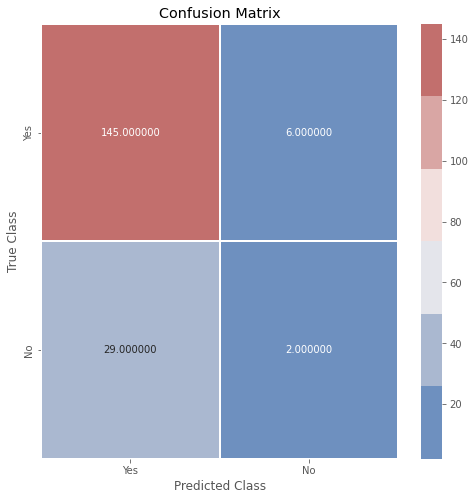

In [94]:
print("----------------------------------------------------------------------------")
print("======================== CROSS VALIDATION PYWEKA ===========================")
print("----------------------------------------------------------------------------")
evl_model_4 = Evaluation(data_train_modelo_4_arff_encoded)
evl_model_4.crossvalidate_model(Model_4, data_train_modelo_4_arff_encoded, 10, Random(1))
print(evl_model_4.summary())

conf_matrix_4 = evl_model_4.confusion_matrix
plt.figure(figsize=(8,8))

sns.heatmap(conf_matrix_4, xticklabels = ["Yes","No"],
            yticklabels = ["Yes","No"], annot = True,
            cmap = sns.color_palette("vlag"),
            fmt = "f", linewidth = 2)

plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [95]:
#evaluate_model_cv(sci_Model_4, X_list, y_list, cv)

----------------------------------------------------------------------------
=========================== TEST MODEL PYWEKA ==============================
----------------------------------------------------------------------------


Correctly Classified Instances          65               83.3333 %
Incorrectly Classified Instances        13               16.6667 %
Kappa statistic                          0.1121
Mean absolute error                      0.3106
Root mean squared error                  0.385 
Relative absolute error                103.6491 %
Root relative squared error            100.3025 %
Total Number of Instances               78     

----------------------------------------------------------------------------
=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 1,000    0,929    0,831      1,000    0,908      0,244    0,626     0,898     0
                 0,071    0,0

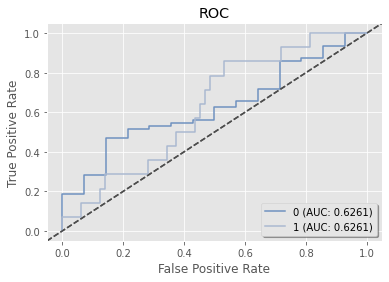

----------------------------------------------------------------------------


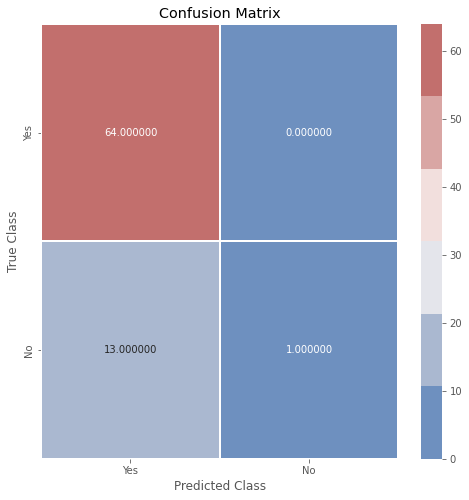

In [96]:
print("----------------------------------------------------------------------------")
print("=========================== TEST MODEL PYWEKA ==============================")
print("----------------------------------------------------------------------------")

evl_model_4 = Evaluation(data_test_modelo_4_arff_encoded)
evl_model_4.test_model(Model_4, data_test_modelo_4_arff_encoded)
print("")

print(evl_model_4.summary())
print("----------------------------------------------------------------------------")
print(evl_model_4.class_details())
print("----------------------------------------------------------------------------")
plcls.plot_roc(evl_model_4, class_index=[0, 1], wait=True)
print("----------------------------------------------------------------------------")
conf_matrix_4 = evl_model_4.confusion_matrix
plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix_4, xticklabels = ["Yes","No"], 
            yticklabels = ["Yes","No"], annot = True, 
            cmap = sns.color_palette("vlag"), fmt = "f", 
            linewidth = 2)

plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [97]:
#evaluate_models(sci_Model_4, X_test_list, y_test_list, 0)

In [98]:
#evaluate_models(sci_Model_4, X_test_list, y_test_list, 1)

### Modelo 4 RUS

In [99]:
base_model_4 = Classifier(classname="weka.classifiers.trees.ADTree", 
                  options=["-B", "10", "-E", "-3", "-S", "1"])

CostS_cls_model_4 = SingleClassifierEnhancer(classname="weka.classifiers.meta.CostSensitiveClassifier", 
                                options =["-cost-matrix", "[0.0 2.0; 1.0 0.0]", "-S", "1"])
CostS_cls_model_4.classifier = base_model_4


RUS = Filter(classname="weka.filters.supervised.instance.SpreadSubsample", options = ["-M","5", "-X", "0", "-S","1"])
fc_model_4_RUS = FilteredClassifier(options=["-S","1"])
fc_model_4_RUS.filter = RUS
fc_model_4_RUS.classifier = CostS_cls_model_4


bagging_cls_model_4 = SingleClassifierEnhancer(classname="weka.classifiers.meta.Bagging",
                         options=["-P", "100", "-S", "1", "-num-slots", "1", "-I", "100"])
bagging_cls_model_4.classifier = fc_model_4_RUS


AttS_cls_model_4 = AttributeSelectedClassifier()
AttS_cls_model_4.search = from_commandline('weka.attributeSelection.Ranker -T -1.7976931348623157E308 -N -1', classname=get_classname(ASSearch))
AttS_cls_model_4.evaluator = from_commandline('weka.attributeSelection.InfoGainAttributeEval', classname=get_classname(ASEvaluation))
AttS_cls_model_4.classifier = bagging_cls_model_4


Model_4_RUS = MultiSearch(options = ["-S", "1","-class-label","1"])
Model_4_RUS.evaluation = "FM"
Model_4_RUS.search = ["-sample-size", "100", "-initial-folds", "2", "-subsequent-folds", "10",
                          "-initial-test-set", ".", "-subsequent-test-set", ".", "-num-slots", "1"]                        
mparam_model_4 = MathParameter()
mparam_model_4.prop = "search.numToSelect"
mparam_model_4.minimum = 5.0
mparam_model_4.maximum = 134.0
mparam_model_4.step = 1.0
mparam_model_4.base = 10.0
mparam_model_4.expression = "I"
Model_4_RUS.parameters = [mparam_model_4]
Model_4_RUS.classifier = AttS_cls_model_4

In [100]:
print("----------------------------------------------------------------------------")
print("================================ Model =====================================")
print("----------------------------------------------------------------------------")
print(Model_4_RUS.to_commandline())

----------------------------------------------------------------------------
================================ Model =====================================
----------------------------------------------------------------------------
weka.classifiers.meta.MultiSearch -E FM -search "weka.core.setupgenerator.MathParameter -property search.numToSelect -min 5.0 -max 134.0 -step 1.0 -base 10.0 -expression I" -class-label 1 -algorithm "weka.classifiers.meta.multisearch.DefaultSearch -sample-size 100.0 -initial-folds 2 -subsequent-folds 10 -initial-test-set . -subsequent-test-set . -num-slots 1" -log-file /home/pablo/TFG_dir/TFG_env -S 1 -W weka.classifiers.meta.AttributeSelectedClassifier -- -E "weka.attributeSelection.InfoGainAttributeEval " -S "weka.attributeSelection.Ranker -T -1.7976931348623157E308 -N -1" -W weka.classifiers.meta.Bagging -- -P 100 -S 1 -num-slots 1 -I 100 -W weka.classifiers.meta.FilteredClassifier -- -F "weka.filters.supervised.instance.SpreadSubsample -M 5.0 -X 0.0 -S 1"

In [101]:
sci_Model_4 = weka_classifier(Model_4_RUS, data_train_modelo_4_arff_encoded)
sci_Model_4.fit2()

sci_Model_4

weka_classifier(classifier=weka.classifiers.meta.MultiSearch:
Classifier: weka.classifiers.meta.AttributeSelectedClassifier -E "weka.attributeSelection.InfoGainAttributeEval " -S "weka.attributeSelection.Ranker -T -1.7976931348623157E308 -N 134" -W weka.classifiers.meta.Bagging -- -P 100 -S 1 -num-slots 1 -I 100 -W weka.classifiers.meta.FilteredClassifier -- -F "weka.filters...
1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,1,0,1,0,1,1,1,0,0,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.702233,0.357143,0.45,0.1875,0.558824,0.475,0.552632,1
1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.39637,0.428571,0.5,0.25,0.529412,0.2,0.631579,0)

In [102]:
Model_4_RUS

weka.classifiers.meta.MultiSearch:
Classifier: weka.classifiers.meta.AttributeSelectedClassifier -E "weka.attributeSelection.InfoGainAttributeEval " -S "weka.attributeSelection.Ranker -T -1.7976931348623157E308 -N 134" -W weka.classifiers.meta.Bagging -- -P 100 -S 1 -num-slots 1 -I 100 -W weka.classifiers.meta.FilteredClassifier -- -F "weka.filters.supervised.instance.SpreadSubsample -M 5.0 -X 0.0 -S 1" -S 1 -W weka.classifiers.meta.CostSensitiveClassifier -- -cost-matrix "[0.0 2.0; 1.0 0.0]" -S 1 -W weka.classifiers.trees.ADTree -- -B 10 -E -3 -S 1

1. parameter: property: search.numToSelect, min: 5.0, max: 134.0, step: 1.0, base: 10.0, expr: I
Evaluation: F-Measure (per class)
Coordinates: 134
Values: 134

AttributeSelectedClassifier:



=== Attribute Selection on all input data ===

Search Method:
	Attribute ranking.

Attribute Evaluator (supervised, Class (nominal): 74 Soft-Tissue_injury_≥4days):
	Information Gain Ranking Filter

Ranked attributes:
 0.0705    67 BMI
 0.0367     2 D

----------------------------------------------------------------------------
======================== CROSS VALIDATION PYWEKA ===========================
----------------------------------------------------------------------------

Correctly Classified Instances         151               82.967  %
Incorrectly Classified Instances        31               17.033  %
Kappa statistic                          0.0408
Mean absolute error                      0.2758
Root mean squared error                  0.379 
Relative absolute error                 96.675  %
Root relative squared error            100.8008 %
Total Number of Instances              182     



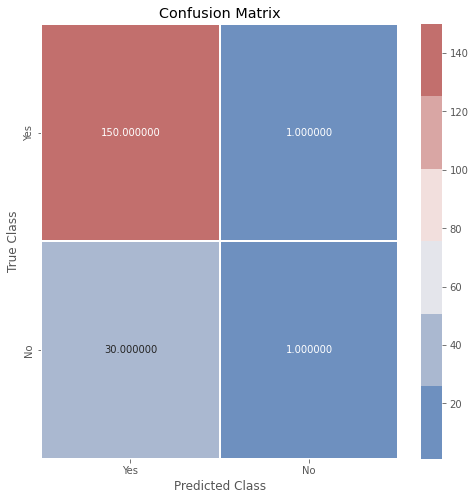

In [103]:
print("----------------------------------------------------------------------------")
print("======================== CROSS VALIDATION PYWEKA ===========================")
print("----------------------------------------------------------------------------")
evl_model_4 = Evaluation(data_train_modelo_4_arff_encoded)
evl_model_4.crossvalidate_model(Model_4_RUS, data_train_modelo_4_arff_encoded, 10, Random(1))
print(evl_model_4.summary())

conf_matrix_4 = evl_model_4.confusion_matrix
plt.figure(figsize=(8,8))

sns.heatmap(conf_matrix_4, xticklabels = ["Yes","No"],
            yticklabels = ["Yes","No"], annot = True,
            cmap = sns.color_palette("vlag"),
            fmt = "f", linewidth = 2)

plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [104]:
#evaluate_model_cv(sci_Model_4, X_list, y_list, cv)

----------------------------------------------------------------------------
=========================== TEST MODEL PYWEKA ==============================
----------------------------------------------------------------------------


Correctly Classified Instances          64               82.0513 %
Incorrectly Classified Instances        14               17.9487 %
Kappa statistic                          0     
Mean absolute error                      0.2743
Root mean squared error                  0.3743
Relative absolute error                 91.5394 %
Root relative squared error             97.5185 %
Total Number of Instances               78     

----------------------------------------------------------------------------
=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 1,000    1,000    0,821      1,000    0,901      ?        0,645     0,903     0
                 0,000    0,0

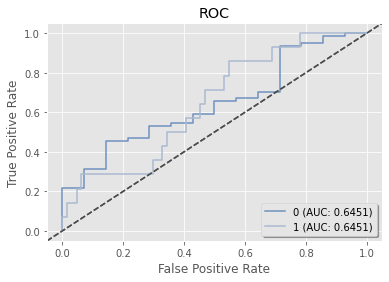

----------------------------------------------------------------------------


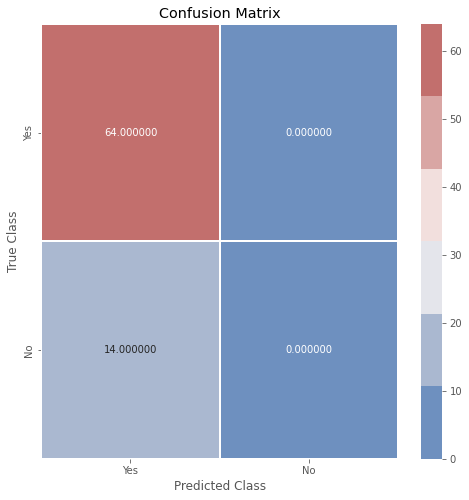

In [105]:
print("----------------------------------------------------------------------------")
print("=========================== TEST MODEL PYWEKA ==============================")
print("----------------------------------------------------------------------------")

evl_model_4 = Evaluation(data_test_modelo_4_arff_encoded)
evl_model_4.test_model(Model_4_RUS, data_test_modelo_4_arff_encoded)
print("")

print(evl_model_4.summary())
print("----------------------------------------------------------------------------")
print(evl_model_4.class_details())
print("----------------------------------------------------------------------------")
plcls.plot_roc(evl_model_4, class_index=[0, 1], wait=True)
print("----------------------------------------------------------------------------")
conf_matrix_4 = evl_model_4.confusion_matrix
plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix_4, xticklabels = ["Yes","No"], 
            yticklabels = ["Yes","No"], annot = True, 
            cmap = sns.color_palette("vlag"), fmt = "f", 
            linewidth = 2)

plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [106]:
#evaluate_models(sci_Model_4, X_test_list, y_test_list, 0)

In [107]:
#evaluate_models(sci_Model_4, X_test_list, y_test_list, 1)

### Modelo 4 ROS

In [108]:
base_model_4 = Classifier(classname="weka.classifiers.trees.ADTree", 
                  options=["-B", "10", "-E", "-3", "-S", "1"])

CostS_cls_model_4 = SingleClassifierEnhancer(classname="weka.classifiers.meta.CostSensitiveClassifier", 
                                options =["-cost-matrix", "[0.0 2.0; 1.0 0.0]", "-S", "1"])
CostS_cls_model_4.classifier = base_model_4


ROS = Filter(classname="weka.filters.supervised.instance.Resample", options = ["-B","1","-Z","165"])
fc_model_4_ROS = FilteredClassifier(options=["-S","1"])
fc_model_4_ROS.filter = ROS
fc_model_4_ROS.classifier = CostS_cls_model_4


bagging_cls_model_4 = SingleClassifierEnhancer(classname="weka.classifiers.meta.Bagging",
                         options=["-P", "100", "-S", "1", "-num-slots", "1", "-I", "100"])
bagging_cls_model_4.classifier = fc_model_4_ROS


AttS_cls_model_4 = AttributeSelectedClassifier()
AttS_cls_model_4.search = from_commandline('weka.attributeSelection.Ranker -T -1.7976931348623157E308 -N -1', classname=get_classname(ASSearch))
AttS_cls_model_4.evaluator = from_commandline('weka.attributeSelection.InfoGainAttributeEval', classname=get_classname(ASEvaluation))
AttS_cls_model_4.classifier = bagging_cls_model_4


Model_4_ROS = MultiSearch(options = ["-S", "1","-class-label","1"])
Model_4_ROS.evaluation = "FM"
Model_4_ROS.search = ["-sample-size", "100", "-initial-folds", "2", "-subsequent-folds", "10",
                          "-initial-test-set", ".", "-subsequent-test-set", ".", "-num-slots", "1"]                        
mparam_model_4 = MathParameter()
mparam_model_4.prop = "search.numToSelect"
mparam_model_4.minimum = 5.0
mparam_model_4.maximum = 134.0
mparam_model_4.step = 1.0
mparam_model_4.base = 10.0
mparam_model_4.expression = "I"
Model_4_ROS.parameters = [mparam_model_4]
Model_4_ROS.classifier = AttS_cls_model_4

In [109]:
print("----------------------------------------------------------------------------")
print("================================ Model =====================================")
print("----------------------------------------------------------------------------")
print(Model_4_ROS.to_commandline())

----------------------------------------------------------------------------
================================ Model =====================================
----------------------------------------------------------------------------
weka.classifiers.meta.MultiSearch -E FM -search "weka.core.setupgenerator.MathParameter -property search.numToSelect -min 5.0 -max 134.0 -step 1.0 -base 10.0 -expression I" -class-label 1 -algorithm "weka.classifiers.meta.multisearch.DefaultSearch -sample-size 100.0 -initial-folds 2 -subsequent-folds 10 -initial-test-set . -subsequent-test-set . -num-slots 1" -log-file /home/pablo/TFG_dir/TFG_env -S 1 -W weka.classifiers.meta.AttributeSelectedClassifier -- -E "weka.attributeSelection.InfoGainAttributeEval " -S "weka.attributeSelection.Ranker -T -1.7976931348623157E308 -N -1" -W weka.classifiers.meta.Bagging -- -P 100 -S 1 -num-slots 1 -I 100 -W weka.classifiers.meta.FilteredClassifier -- -F "weka.filters.supervised.instance.Resample -B 1.0 -S 1 -Z 165.0" -S 1

In [110]:
sci_Model_4 = weka_classifier(Model_4_ROS, data_train_modelo_4_arff_encoded)
sci_Model_4.fit2()

sci_Model_4

weka_classifier(classifier=weka.classifiers.meta.MultiSearch:
Classifier: weka.classifiers.meta.AttributeSelectedClassifier -E "weka.attributeSelection.InfoGainAttributeEval " -S "weka.attributeSelection.Ranker -T -1.7976931348623157E308 -N 60" -W weka.classifiers.meta.Bagging -- -P 100 -S 1 -num-slots 1 -I 100 -W weka.classifiers.meta.FilteredClassifier -- -F "weka.filters....
1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,1,0,1,0,1,1,1,0,0,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.702233,0.357143,0.45,0.1875,0.558824,0.475,0.552632,1
1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.39637,0.428571,0.5,0.25,0.529412,0.2,0.631579,0)

In [111]:
Model_4_ROS

weka.classifiers.meta.MultiSearch:
Classifier: weka.classifiers.meta.AttributeSelectedClassifier -E "weka.attributeSelection.InfoGainAttributeEval " -S "weka.attributeSelection.Ranker -T -1.7976931348623157E308 -N 60" -W weka.classifiers.meta.Bagging -- -P 100 -S 1 -num-slots 1 -I 100 -W weka.classifiers.meta.FilteredClassifier -- -F "weka.filters.supervised.instance.Resample -B 1.0 -S 1 -Z 165.0" -S 1 -W weka.classifiers.meta.CostSensitiveClassifier -- -cost-matrix "[0.0 2.0; 1.0 0.0]" -S 1 -W weka.classifiers.trees.ADTree -- -B 10 -E -3 -S 1

1. parameter: property: search.numToSelect, min: 5.0, max: 134.0, step: 1.0, base: 10.0, expr: I
Evaluation: F-Measure (per class)
Coordinates: 60
Values: 60

AttributeSelectedClassifier:



=== Attribute Selection on all input data ===

Search Method:
	Attribute ranking.

Attribute Evaluator (supervised, Class (nominal): 74 Soft-Tissue_injury_≥4days):
	Information Gain Ranking Filter

Ranked attributes:
 0.0705    67 BMI
 0.0367     2 DVJ_Valgu

----------------------------------------------------------------------------
======================== CROSS VALIDATION PYWEKA ===========================
----------------------------------------------------------------------------

Correctly Classified Instances         145               79.6703 %
Incorrectly Classified Instances        37               20.3297 %
Kappa statistic                          0.0491
Mean absolute error                      0.3319
Root mean squared error                  0.3967
Relative absolute error                116.3435 %
Root relative squared error            105.5    %
Total Number of Instances              182     



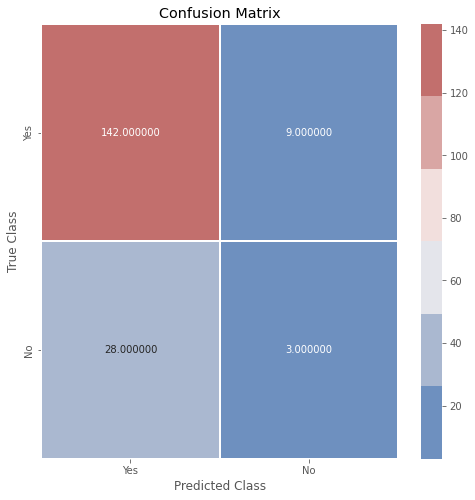

In [112]:
print("----------------------------------------------------------------------------")
print("======================== CROSS VALIDATION PYWEKA ===========================")
print("----------------------------------------------------------------------------")
evl_model_4 = Evaluation(data_train_modelo_4_arff_encoded)
evl_model_4.crossvalidate_model(Model_4_ROS, data_train_modelo_4_arff_encoded, 10, Random(1))
print(evl_model_4.summary())

conf_matrix_4 = evl_model_4.confusion_matrix
plt.figure(figsize=(8,8))

sns.heatmap(conf_matrix_4, xticklabels = ["Yes","No"],
            yticklabels = ["Yes","No"], annot = True,
            cmap = sns.color_palette("vlag"),
            fmt = "f", linewidth = 2)

plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [113]:
#evaluate_model_cv(sci_Model_4, X_list, y_list, cv)

----------------------------------------------------------------------------
=========================== TEST MODEL PYWEKA ==============================
----------------------------------------------------------------------------


Correctly Classified Instances          64               82.0513 %
Incorrectly Classified Instances        14               17.9487 %
Kappa statistic                          0.2155
Mean absolute error                      0.3371
Root mean squared error                  0.3971
Relative absolute error                112.4771 %
Root relative squared error            103.4449 %
Total Number of Instances               78     

----------------------------------------------------------------------------
=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0,953    0,786    0,847      0,953    0,897      0,241    0,644     0,902     0
                 0,214    0,0

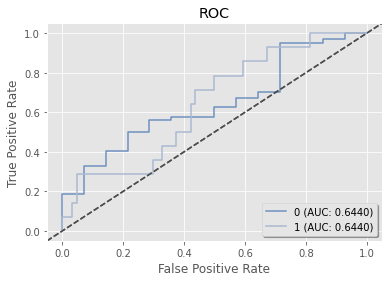

----------------------------------------------------------------------------


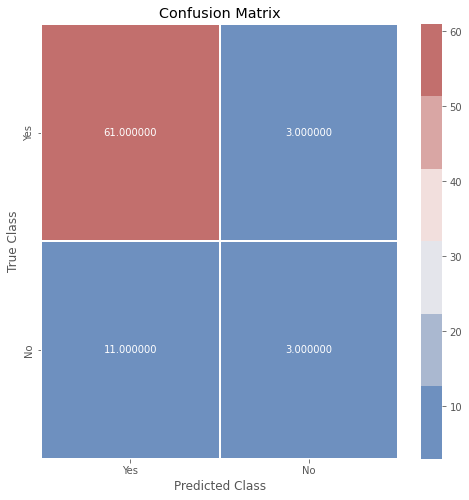

In [114]:
print("----------------------------------------------------------------------------")
print("=========================== TEST MODEL PYWEKA ==============================")
print("----------------------------------------------------------------------------")

evl_model_4 = Evaluation(data_test_modelo_4_arff_encoded)
evl_model_4.test_model(Model_4_ROS, data_test_modelo_4_arff_encoded)
print("")

print(evl_model_4.summary())
print("----------------------------------------------------------------------------")
print(evl_model_4.class_details())
print("----------------------------------------------------------------------------")
plcls.plot_roc(evl_model_4, class_index=[0, 1], wait=True)
print("----------------------------------------------------------------------------")
conf_matrix_4 = evl_model_4.confusion_matrix
plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix_4, xticklabels = ["Yes","No"], 
            yticklabels = ["Yes","No"], annot = True, 
            cmap = sns.color_palette("vlag"), fmt = "f", 
            linewidth = 2)

plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [115]:
#evaluate_models(sci_Model_4, X_test_list, y_test_list, 0)

In [116]:
#evaluate_models(sci_Model_4, X_test_list, y_test_list, 1)

### Modelo 4 RUS Y ROS

In [117]:
base_model_4 = Classifier(classname="weka.classifiers.trees.ADTree", 
                  options=["-B", "10", "-E", "-3", "-S", "1"])

CostS_cls_model_4 = SingleClassifierEnhancer(classname="weka.classifiers.meta.CostSensitiveClassifier", 
                                options =["-cost-matrix", "[0.0 2.0; 1.0 0.0]", "-S", "1"])
CostS_cls_model_4.classifier = base_model_4


RUS = Filter(classname="weka.filters.supervised.instance.SpreadSubsample", options = ["-M","5", "-X", "0", "-S","1"])
fc_model_4_RUS = FilteredClassifier(options=["-S","1"])
fc_model_4_RUS.filter = RUS
fc_model_4_RUS.classifier = CostS_cls_model_4


ROS = Filter(classname="weka.filters.supervised.instance.Resample", options = ["-B","1","-Z","165"])
fc_model_4_ROS = FilteredClassifier(options=["-S","1"])
fc_model_4_ROS.filter = ROS
fc_model_4_ROS.classifier = fc_model_4_RUS


bagging_cls_model_4 = SingleClassifierEnhancer(classname="weka.classifiers.meta.Bagging",
                         options=["-P", "100", "-S", "1", "-num-slots", "1", "-I", "100"])
bagging_cls_model_4.classifier = fc_model_4_ROS


AttS_cls_model_4 = AttributeSelectedClassifier()
AttS_cls_model_4.search = from_commandline('weka.attributeSelection.Ranker -T -1.7976931348623157E308 -N -1', classname=get_classname(ASSearch))
AttS_cls_model_4.evaluator = from_commandline('weka.attributeSelection.InfoGainAttributeEval', classname=get_classname(ASEvaluation))
AttS_cls_model_4.classifier = bagging_cls_model_4


Model_4_RUS_ROS = MultiSearch(options = ["-S", "1","-class-label","1"])
Model_4_RUS_ROS.evaluation = "FM"
Model_4_RUS_ROS.search = ["-sample-size", "100", "-initial-folds", "2", "-subsequent-folds", "10",
                          "-initial-test-set", ".", "-subsequent-test-set", ".", "-num-slots", "1"]                        
mparam_model_4 = MathParameter()
mparam_model_4.prop = "search.numToSelect"
mparam_model_4.minimum = 5.0
mparam_model_4.maximum = 134.0
mparam_model_4.step = 1.0
mparam_model_4.base = 10.0
mparam_model_4.expression = "I"
Model_4_RUS_ROS.parameters = [mparam_model_4]
Model_4_RUS_ROS.classifier = AttS_cls_model_4

In [118]:
print("----------------------------------------------------------------------------")
print("================================ Model =====================================")
print("----------------------------------------------------------------------------")
print(Model_4_RUS_ROS.to_commandline())

----------------------------------------------------------------------------
================================ Model =====================================
----------------------------------------------------------------------------
weka.classifiers.meta.MultiSearch -E FM -search "weka.core.setupgenerator.MathParameter -property search.numToSelect -min 5.0 -max 134.0 -step 1.0 -base 10.0 -expression I" -class-label 1 -algorithm "weka.classifiers.meta.multisearch.DefaultSearch -sample-size 100.0 -initial-folds 2 -subsequent-folds 10 -initial-test-set . -subsequent-test-set . -num-slots 1" -log-file /home/pablo/TFG_dir/TFG_env -S 1 -W weka.classifiers.meta.AttributeSelectedClassifier -- -E "weka.attributeSelection.InfoGainAttributeEval " -S "weka.attributeSelection.Ranker -T -1.7976931348623157E308 -N -1" -W weka.classifiers.meta.Bagging -- -P 100 -S 1 -num-slots 1 -I 100 -W weka.classifiers.meta.FilteredClassifier -- -F "weka.filters.supervised.instance.Resample -B 1.0 -S 1 -Z 165.0" -S 1

In [119]:
sci_Model_4 = weka_classifier(Model_4_RUS_ROS, data_train_modelo_4_arff_encoded)
sci_Model_4.fit2()

sci_Model_4

weka_classifier(classifier=weka.classifiers.meta.MultiSearch:
Classifier: weka.classifiers.meta.AttributeSelectedClassifier -E "weka.attributeSelection.InfoGainAttributeEval " -S "weka.attributeSelection.Ranker -T -1.7976931348623157E308 -N 60" -W weka.classifiers.meta.Bagging -- -P 100 -S 1 -num-slots 1 -I 100 -W weka.classifiers.meta.FilteredClassifier -- -F "weka.filters....
1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,1,0,1,0,1,1,1,0,0,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.702233,0.357143,0.45,0.1875,0.558824,0.475,0.552632,1
1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.39637,0.428571,0.5,0.25,0.529412,0.2,0.631579,0)

In [120]:
Model_4_RUS_ROS

weka.classifiers.meta.MultiSearch:
Classifier: weka.classifiers.meta.AttributeSelectedClassifier -E "weka.attributeSelection.InfoGainAttributeEval " -S "weka.attributeSelection.Ranker -T -1.7976931348623157E308 -N 60" -W weka.classifiers.meta.Bagging -- -P 100 -S 1 -num-slots 1 -I 100 -W weka.classifiers.meta.FilteredClassifier -- -F "weka.filters.supervised.instance.Resample -B 1.0 -S 1 -Z 165.0" -S 1 -W weka.classifiers.meta.FilteredClassifier -- -F "weka.filters.supervised.instance.SpreadSubsample -M 5.0 -X 0.0 -S 1" -S 1 -W weka.classifiers.meta.CostSensitiveClassifier -- -cost-matrix "[0.0 2.0; 1.0 0.0]" -S 1 -W weka.classifiers.trees.ADTree -- -B 10 -E -3 -S 1

1. parameter: property: search.numToSelect, min: 5.0, max: 134.0, step: 1.0, base: 10.0, expr: I
Evaluation: F-Measure (per class)
Coordinates: 60
Values: 60

AttributeSelectedClassifier:



=== Attribute Selection on all input data ===

Search Method:
	Attribute ranking.

Attribute Evaluator (supervised, Class (nominal): 

----------------------------------------------------------------------------
======================== CROSS VALIDATION PYWEKA ===========================
----------------------------------------------------------------------------

Correctly Classified Instances         146               80.2198 %
Incorrectly Classified Instances        36               19.7802 %
Kappa statistic                          0.0903
Mean absolute error                      0.3354
Root mean squared error                  0.3997
Relative absolute error                117.5611 %
Root relative squared error            106.2893 %
Total Number of Instances              182     



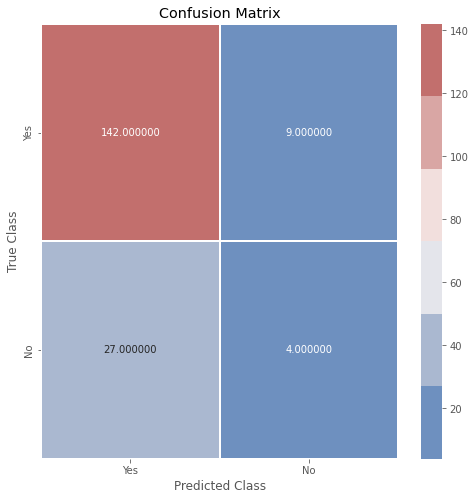

In [121]:
print("----------------------------------------------------------------------------")
print("======================== CROSS VALIDATION PYWEKA ===========================")
print("----------------------------------------------------------------------------")
evl_model_4 = Evaluation(data_train_modelo_4_arff_encoded)
evl_model_4.crossvalidate_model(Model_4_RUS_ROS, data_train_modelo_4_arff_encoded, 10, Random(1))
print(evl_model_4.summary())

conf_matrix_4 = evl_model_4.confusion_matrix
plt.figure(figsize=(8,8))

sns.heatmap(conf_matrix_4, xticklabels = ["Yes","No"],
            yticklabels = ["Yes","No"], annot = True,
            cmap = sns.color_palette("vlag"),
            fmt = "f", linewidth = 2)

plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [122]:
#evaluate_model_cv(sci_Model_4, X_list, y_list, cv)

----------------------------------------------------------------------------
=========================== TEST MODEL PYWEKA ==============================
----------------------------------------------------------------------------


Correctly Classified Instances          64               82.0513 %
Incorrectly Classified Instances        14               17.9487 %
Kappa statistic                          0.2155
Mean absolute error                      0.3372
Root mean squared error                  0.3973
Relative absolute error                112.5366 %
Root relative squared error            103.495  %
Total Number of Instances               78     

----------------------------------------------------------------------------
=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0,953    0,786    0,847      0,953    0,897      0,241    0,644     0,902     0
                 0,214    0,0

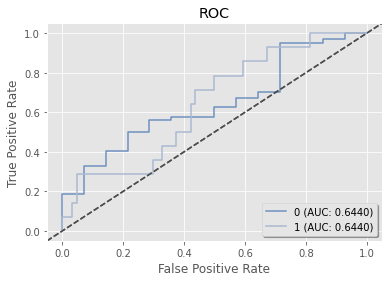

----------------------------------------------------------------------------


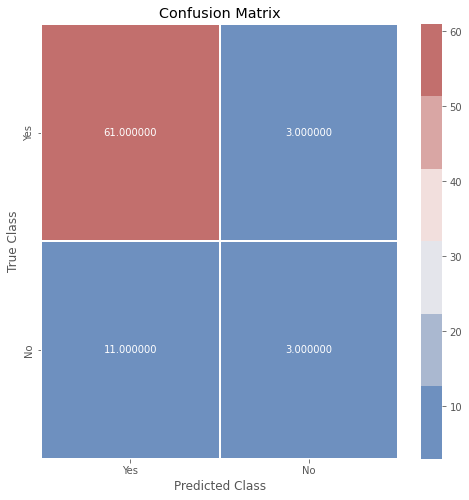

In [123]:
print("----------------------------------------------------------------------------")
print("=========================== TEST MODEL PYWEKA ==============================")
print("----------------------------------------------------------------------------")

evl_model_4 = Evaluation(data_test_modelo_4_arff_encoded)
evl_model_4.test_model(Model_4_RUS_ROS, data_test_modelo_4_arff_encoded)
print("")

print(evl_model_4.summary())
print("----------------------------------------------------------------------------")
print(evl_model_4.class_details())
print("----------------------------------------------------------------------------")
plcls.plot_roc(evl_model_4, class_index=[0, 1], wait=True)
print("----------------------------------------------------------------------------")
conf_matrix_4 = evl_model_4.confusion_matrix
plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix_4, xticklabels = ["Yes","No"], 
            yticklabels = ["Yes","No"], annot = True, 
            cmap = sns.color_palette("vlag"), fmt = "f", 
            linewidth = 2)

plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [124]:
#evaluate_models(sci_Model_4, X_test_list, y_test_list, 0)

In [125]:
#evaluate_models(sci_Model_4, X_test_list, y_test_list, 1)

In [126]:
jvm.stop()